<h2>2<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα αναλυθούν τεχνητές και πραγματικές τοπολογίες σύνθετων δικτύων με βάση τις μετρικές που χρησιμοποιήθηκαν στην προηγούμενη άσκηση και κάποιες τεχνικές που έχουν ως στόχο την εύρεση κοινωνικής δομής. Συγκεκριμένα, θα χρησιμοποιηθούν και θα συγκριθούν διάφοροι αλγόριθμοι εντοπισμού κοινοτήτων σε γράφους δικτύων που προκύπτουν από πραγματικά δεδομένα καθώς και στους συνθετικούς γράφους της πρώτης εργαστηριακής άσκησης.</p>

In [3]:
%matplotlib inline

import matplotlib
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import itertools
import pandas as pd
from tqdm import tqdm
from matplotlib.pyplot import figure
from sklearn.cluster import SpectralClustering

## Α. Μελέτη πραγματικών τοπολογιών
<p style=text-align:justify>Στο παρόν ερώτημα θα μελετήσετε και θα αποκτήσετε αίσθηση της τοπολογικής δομής πραγματικών δικτύων. Πιο συγκεκριμένα, για τις τοπολογίες που φαίνονται στον <b>πίνακα 1</b>, να βρεθούν και να δειχθούν:</p>
<ol>
    <li>Η κατανομή του βαθμού κόμβου και ο μέσος βαθμός κάθε τοπολογίας.</li>
    <li>Η κατανομή του συντελεστή ομαδοποίησης κόμβου και ο μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας.</li>
    <li>Η κατανομή της κεντρικότητας εγγύτητας και η μέση κεντρικότητα εγγύτητας κάθε τοπολογίας.</li>
</ol>
<p style=text-align:justify>Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο κάθε μίας από τις πραγματικές τοπολογίες με βάση τους τύπους δικτύων που εξετάστηκαν στην πρώτη εργαστηριακή άσκηση.</p>

<table style=width:100%>
    <caption>Πίνακας <b>1</b>: Πραγματικές τοπολογίες</a></caption>
<tr>
    <th style=text-align:left>Τοπολογία</th>
    <th style=text-align:left>Αρχείο</th>
    <th style=text-align:left>Περιγραφή</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Game of Thrones - season 5</td>
    <td style=text-align:left><a style=text-decoration:none href='https://networkofthrones.wordpress.com/the-series/season-5/'>GoT</a></td>
    <td style=text-align:left><p style=text-align:justify> The season 5 <b>GoT</b> network represents the interactions between the characters of Game of Thrones in season 5. The season 5 network has 118 nodes (characters) and 394 weighted edges, corresponding to 5,139 interactions. Data can be found here: <a style=text-decoration:none href='https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s5-edges.csv'>GoT_data</a></p>
</tr> 
<tr>
    <td style=text-align:left>email-Eu-core</td>
    <td style=text-align:left><a style=text-decoration:none href='https://snap.stanford.edu/data/email-Eu-core.html'>email-eu-core</a></td>
    <td style=text-align:left><p style=text-align:justify> The network <b>email-Eu-core</b> was generated using email data from a large European research institution. There is an edge (u, v) in the network if person u sent person v at least one email. The e-mails only represent communication between institution members (the core) and the dataset does not contain incoming messages from or outgoing messages to the rest of the world. The dataset also contains "ground-truth" community memberships of the nodes. Each individual belongs to exactly one of 42 departments at the research institute. </p>
</tr> 
    
</table>

### Παραγωγή συνθετικών τοπολογιών
<p>Προσοχή! Τα δίκτυα που θα παράξετε θα πρέπει να είναι συνδεδεμένα.</p>

In [4]:
n=80
d=4
M=300
R=0.25
p=0.3
k=4
seedno=5
random.seed(seedno)

graphs = []

REG = nx.watts_strogatz_graph(n, d, 0, seedno) 
graphs.append(('REG',REG))
RGER = nx.gnm_random_graph(n,M,seedno) 
graphs.append(('RGER',RGER))
RGG = nx.random_geometric_graph(n, R, seed=seedno)
graphs.append(('RGG',RGG))
SF = nx.barabasi_albert_graph(n, d, seedno) 
graphs.append(('SF',SF))
SW = nx.watts_strogatz_graph(n=n,k=d,p=p,seed=seedno) 
graphs.append(('SW',SW))


### Εισαγωγή και οπτικοποίηση πραγματικών τοπολογιών

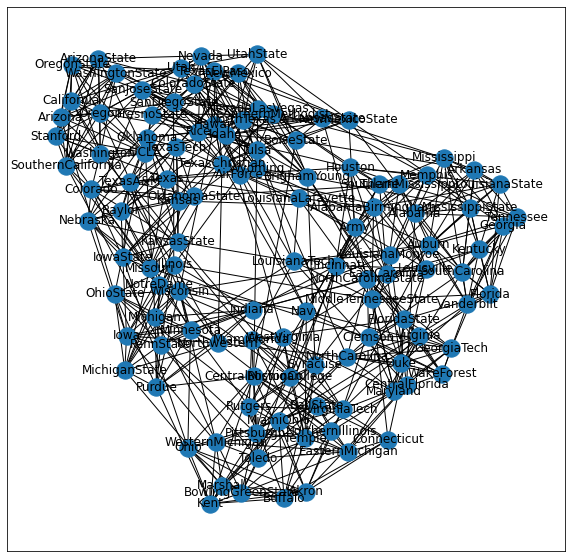

In [5]:
#football network
football=nx.read_gml(r"football.gml")

graphs.append(('football',football))
figure(figsize=(10, 10))
nx.draw_networkx(football)

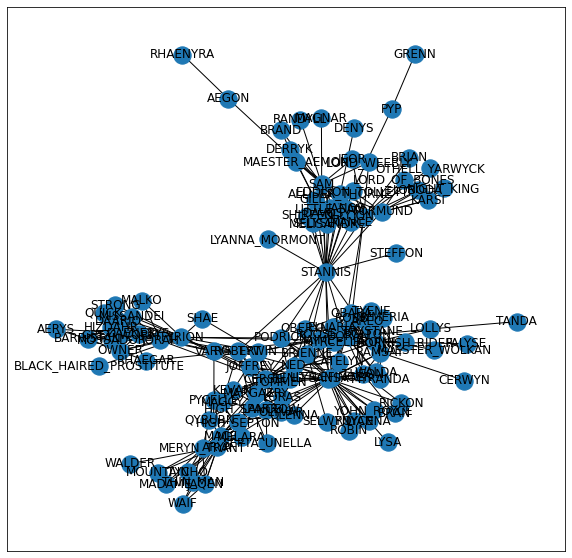

In [6]:
#Game of thrones network
import csv
got=nx.Graph()
with open('got_s5.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    next(csv_reader)
    for row in csv_reader:
        got.add_edge(row[0],row[1])
        line_count += 1

graphs.append(('got',got))
figure(figsize=(10, 10))
nx.draw_networkx(got)

#### Προσοχή! Θα μελετήσετε τη μεγαλύτερη συνδεδεμένη συνιστώσα του δικτύου email-Eu-core, αφού πρώτα αφαιρέσετε τα self-loops. Μπορείτε να κάνετε χρήση των συναρτήσεων connected_components, subgraph, remove_edges_from του networkx.

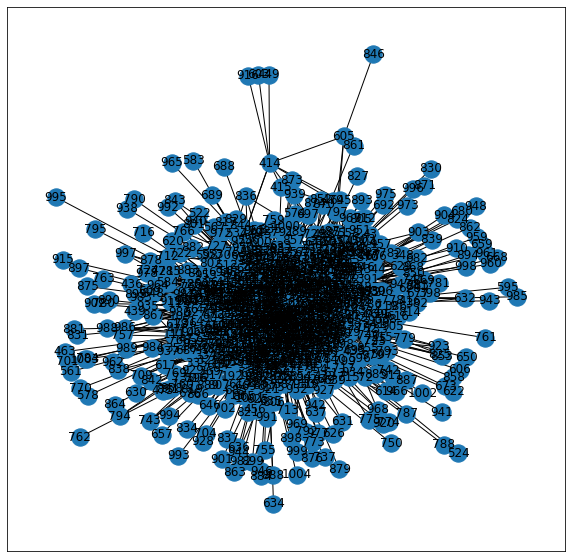

In [7]:
#email-Eu-core network
eu=nx.read_edgelist("email-Eu-core.txt",create_using=nx.Graph())

connected_components = sorted(nx.connected_components(eu), key=len, reverse=True)
eu_comp = eu.subgraph(connected_components[0])

eu_comp = nx.Graph(eu_comp)

eu_comp.remove_edges_from(nx.selfloop_edges(eu_comp))

graphs.append(('eu_comp',eu_comp))

figure(figsize=(10, 10))
nx.draw_networkx(eu_comp)




### Μελέτη βαθμού κόμβου για πραγματικές και συνθετικές τοπολογίες

In [8]:
def find_degree(name, G):
    print(name)
    n = G.number_of_nodes()
    G_deg_cent = nx.degree_centrality(G)
    G_deg_cent_val = np.array(list(G_deg_cent.values())) 

    G_deg_cent_non_normalized = G_deg_cent.copy()
    G_deg_cent_non_normalized.update((x, int(y * (n-1))) for x, y in G_deg_cent_non_normalized.items())
    G_deg_cent_non_normalized_val = np.array(list(G_deg_cent_non_normalized.values())) 

    if(nx.is_connected(G)):
        print("Graph is connected")
    print("Average degree:", np.mean(G_deg_cent_non_normalized_val))
    print("Variance of degree:",np.var(G_deg_cent_non_normalized_val))
    print("Average Normalized degree:", np.mean(G_deg_cent_val))
    print("Variance of Normalized degree:",np.var(G_deg_cent_val))
    fig = plt.figure(figsize=(14, 6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ax1.set_ylabel("# of nodes")
    ax1.set_xlabel("Normalized degree centrality")
    ax2.set_ylabel("# of nodes")
    ax2.set_xlabel("degree centrality")
    ax1.hist(G_deg_cent_val, range = (0,1), bins = 100)
    ax1.title.set_text('Histogram of Normalized degree centrality for '+ name)
    ax2.hist(G_deg_cent_non_normalized_val, range = (0,n), bins = n)
    ax2.title.set_text('Histogram of Non-Normalized degree centrality for '+ name)
    plt.show()

REG
Graph is connected
Average degree: 4.0
Variance of degree: 0.0
Average Normalized degree: 0.05063291139240507
Variance of Normalized degree: 4.81482486096809e-35


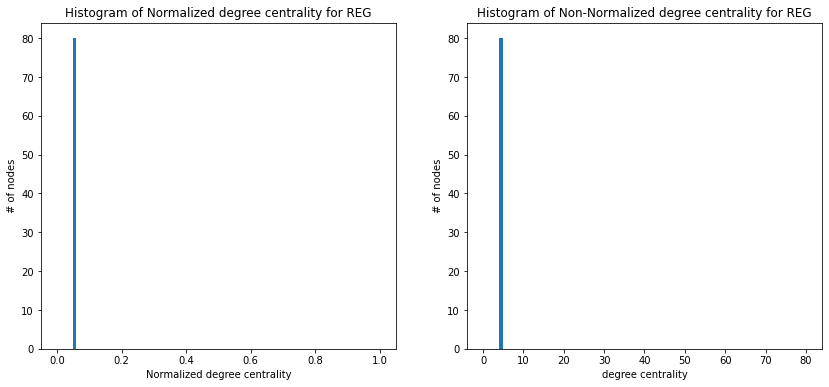

RGER
Graph is connected
Average degree: 7.5
Variance of degree: 8.15
Average Normalized degree: 0.09493670886075949
Variance of Normalized degree: 0.001305880467873738


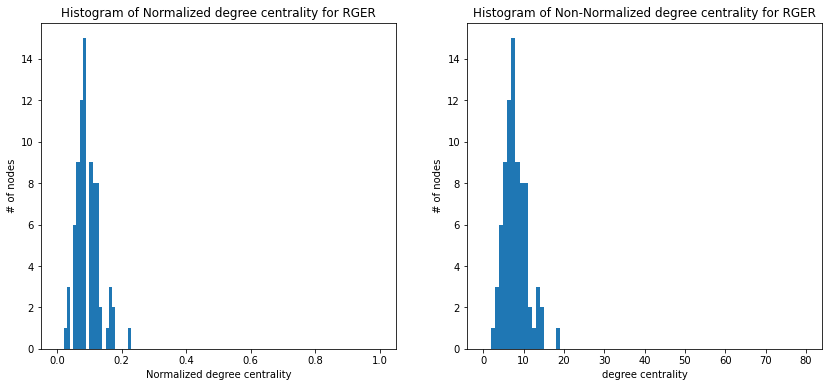

RGG
Graph is connected
Average degree: 11.1875
Variance of degree: 13.25234375
Average Normalized degree: 0.14240506329113925
Variance of Normalized degree: 0.002189152379426374


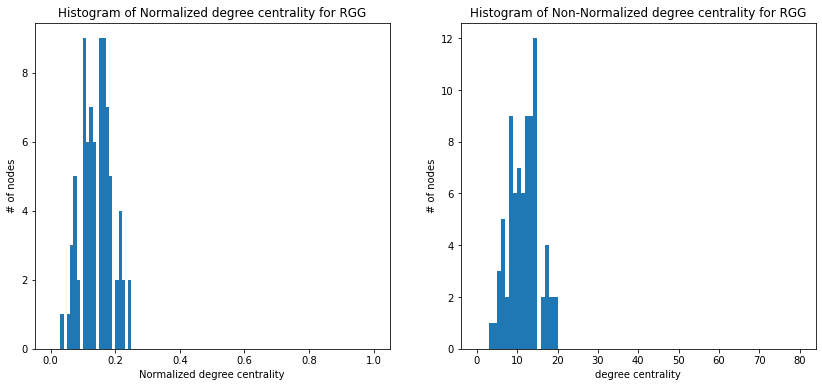

SF
Graph is connected
Average degree: 7.5875
Variance of degree: 33.217343750000005
Average Normalized degree: 0.09620253164556963
Variance of Normalized degree: 0.005350104149975965


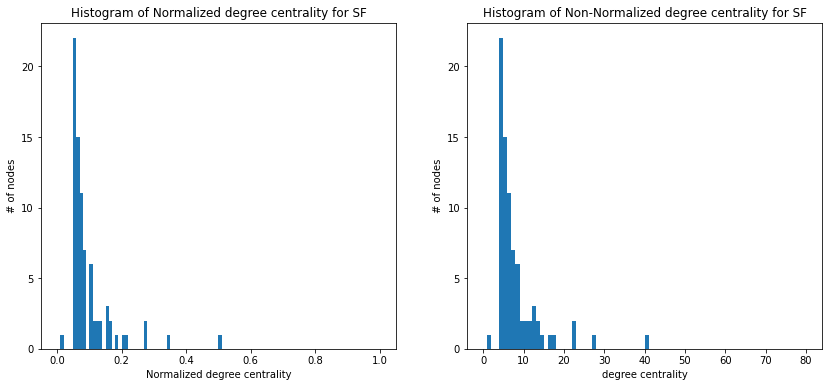

SW
Graph is connected
Average degree: 4.0
Variance of degree: 0.8
Average Normalized degree: 0.05063291139240507
Variance of Normalized degree: 0.00012818458580355713


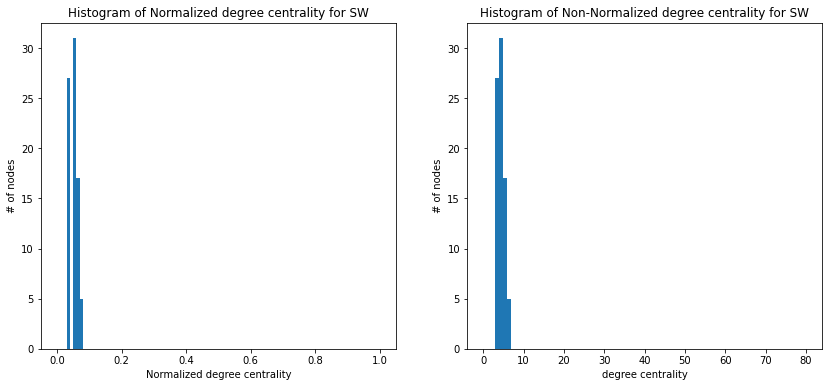

football
Graph is connected
Average degree: 10.660869565217391
Variance of degree: 0.7806427221172025
Average Normalized degree: 0.0935163996948894
Variance of Normalized degree: 6.0067922600584965e-05


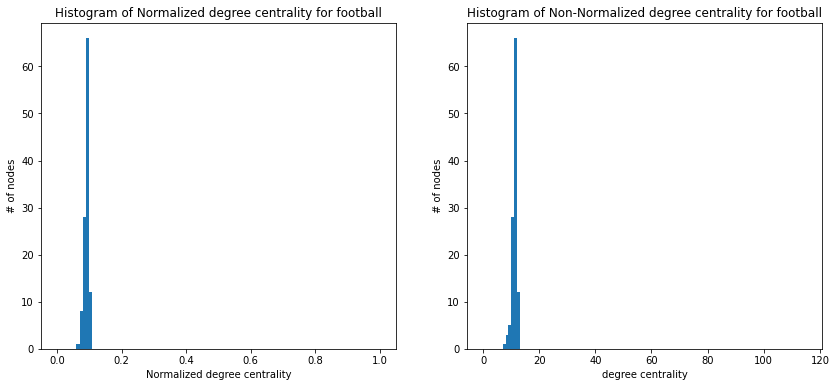

got
Graph is connected
Average degree: 6.65546218487395
Variance of degree: 31.049360920838932
Average Normalized degree: 0.05640222190571145
Variance of Normalized degree: 0.002229916756739365


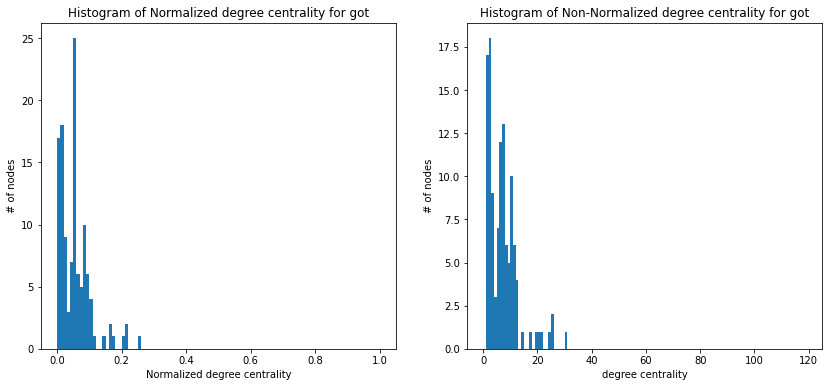

eu_comp
Graph is connected
Average degree: 32.5841784989858
Variance of degree: 1370.887944406272
Average Normalized degree: 0.033080384262929745
Variance of Normalized degree: 0.001412958792451516


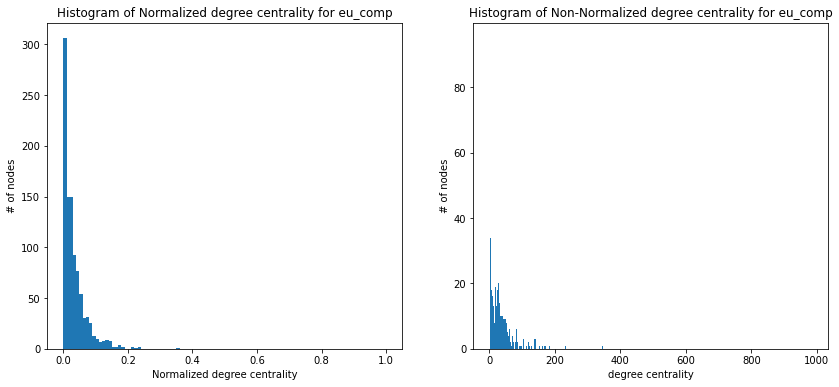

In [9]:
for(name,G) in graphs:
    find_degree(name,G)

### Μελέτη συντελεστή ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες

In [10]:
def clustering_coef_info(name,G):
    print(name)
    n = G.number_of_nodes()
    G_clust_coef = nx.clustering(G)
    G_clust_coef_val = np.array(list(G_clust_coef.values())) 
    # B1.1 Histogram of clustering coefficients
    plt.figure()
    plt.title("Histogram of Clustering coefficients for " + name)
    plt.ylabel("# of nodes")
    plt.xlabel("Clustering coefficient value")
    plt.hist(G_clust_coef_val, range = (0,1), bins = 100)
    # B1.2 Calculate mean value and variance of clustering coefficients
    print("Mean value of clustering coefficients:", np.mean(G_clust_coef_val))
    print("Variance of clustering coefficients:",np.var(G_clust_coef_val))

REG
Mean value of clustering coefficients: 0.5
Variance of clustering coefficients: 0.0
RGER
Mean value of clustering coefficients: 0.08497775916893564
Variance of clustering coefficients: 0.004288874899085844
RGG
Mean value of clustering coefficients: 0.6825788363897883
Variance of clustering coefficients: 0.020650408506201083
SF
Mean value of clustering coefficients: 0.22922761606585135
Variance of clustering coefficients: 0.02892890777065041
SW
Mean value of clustering coefficients: 0.16708333333333333
Variance of clustering coefficients: 0.028069270833333326
football
Mean value of clustering coefficients: 0.40321601104209803
Variance of clustering coefficients: 0.010767498242611785
got
Mean value of clustering coefficients: 0.5744036387164707
Variance of clustering coefficients: 0.12611105959324512
eu_comp
Mean value of clustering coefficients: 0.4070504475195386
Variance of clustering coefficients: 0.06137235066322143


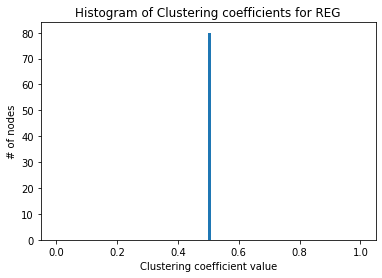

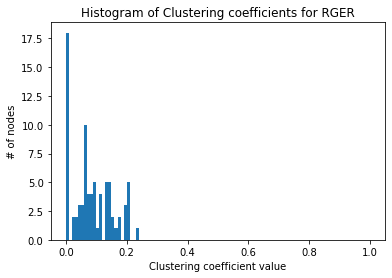

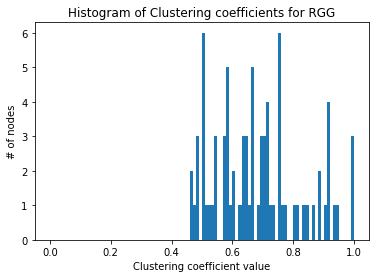

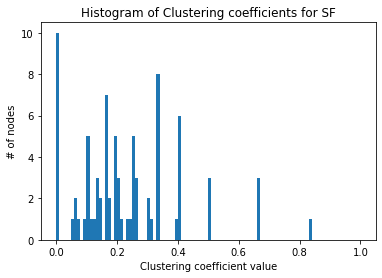

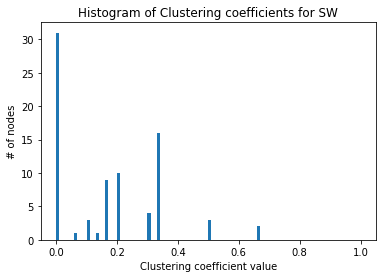

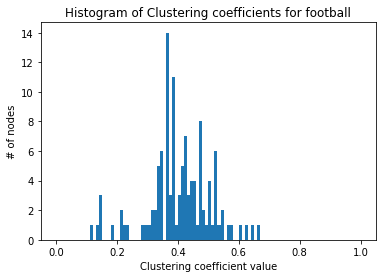

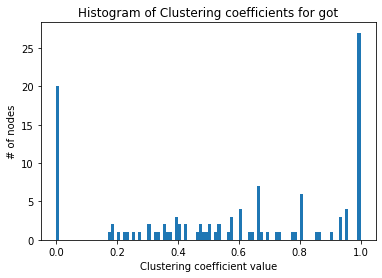

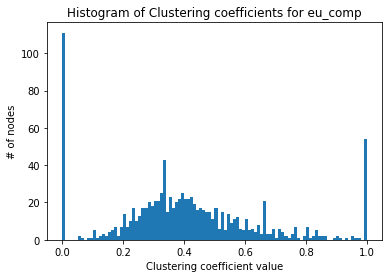

In [11]:
for(name,G) in graphs:
    clustering_coef_info(name,G)

### Μελέτη κεντρικότητας εγγύτητας για πραγματικές και συνθετικές τοπολογίες 

In [12]:
def find_closeness(name,G):
    print(name)
    n = G.number_of_nodes()
    G_closeness_cent = nx.closeness_centrality(G)
    G_closeness_cent_val = np.array(list(G_closeness_cent.values())) 

    G_closeness_cent_non_normalized = G_closeness_cent.copy()
    G_closeness_cent_non_normalized.update((x, (y / (n-1))) for x, y in G_closeness_cent_non_normalized.items())
    G_closeness_cent_non_normalized_val = np.array(list(G_closeness_cent_non_normalized.values())) 

    
    print("Average closeness centrality:", np.mean(G_closeness_cent_non_normalized_val))
    print("Variance of closeness centrality:",np.var(G_closeness_cent_non_normalized_val))
    print("Average normalized closeness centrality:", np.mean(G_closeness_cent_val))
    print("Variance of normalized closeness centrality:",np.var(G_closeness_cent_val))
    fig = plt.figure(figsize=(14, 6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ax1.set_ylabel("# of nodes")
    ax1.set_xlabel("Normalized closeness centrality")
    ax2.set_ylabel("# of nodes")
    ax2.set_xlabel("closeness centrality")
    ax1.hist(G_closeness_cent_val, range = (0,1), bins = 100)
    ax1.title.set_text('Histogram of Normalized closeness centrality for '+ name)
    ax2.hist(G_closeness_cent_non_normalized_val, range = (0,0.02), bins = 100)
    ax2.title.set_text('Histogram of Non-Normalized closeness centrality for '+ name)
    plt.show()

REG
Average closeness centrality: 0.001219512195121951
Variance of closeness centrality: 4.70197740328915e-38
Average normalized closeness centrality: 0.09634146341463413
Variance of normalized closeness centrality: 1.925929944387236e-34


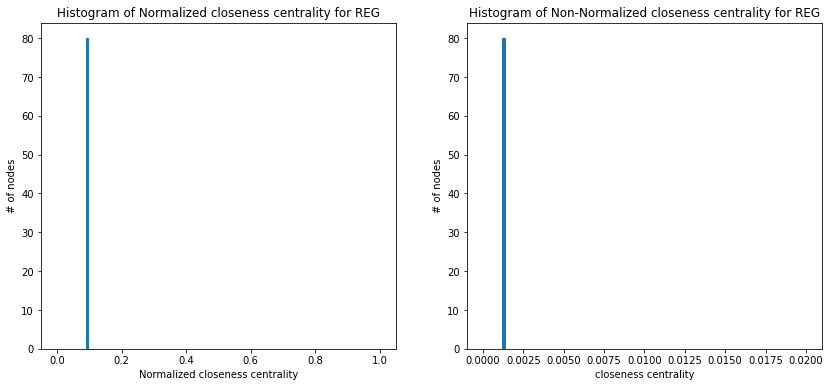

RGER
Average closeness centrality: 0.005369997216352862
Variance of closeness centrality: 2.190733511193154e-07
Average normalized closeness centrality: 0.4242297800918761
Variance of normalized closeness centrality: 0.0013672367843356472


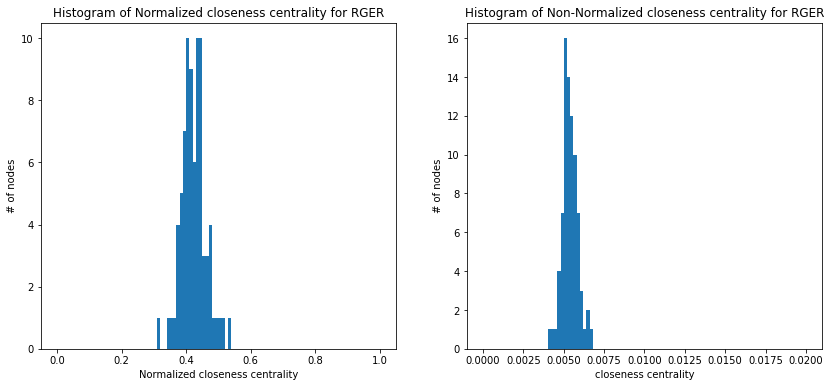

RGG
Average closeness centrality: 0.0040517470386399745
Variance of closeness centrality: 3.770093903103974e-07
Average normalized closeness centrality: 0.320088016052558
Variance of normalized closeness centrality: 0.0023529156049271896


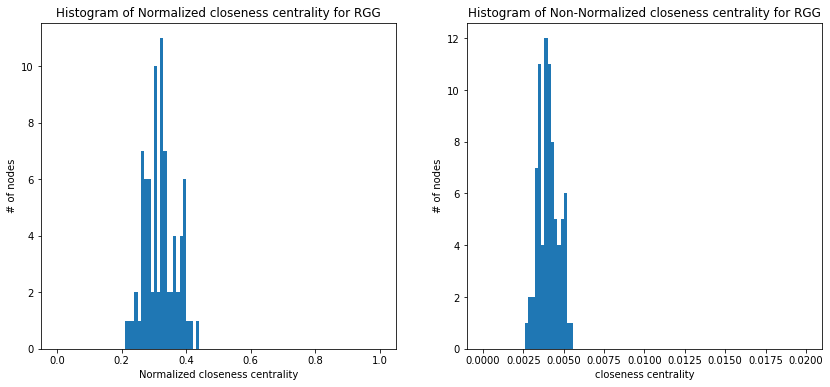

SF
Average closeness centrality: 0.005651207389721309
Variance of closeness centrality: 4.3967848783112005e-07
Average normalized closeness centrality: 0.4464453837879834
Variance of normalized closeness centrality: 0.00274403344255402


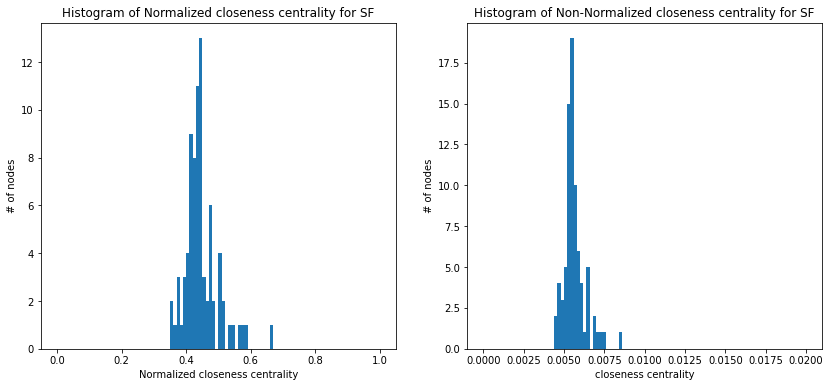

SW
Average closeness centrality: 0.003406869607133495
Variance of closeness centrality: 5.1292725298343146e-08
Average normalized closeness centrality: 0.26914269896354603
Variance of normalized closeness centrality: 0.0003201178985869596


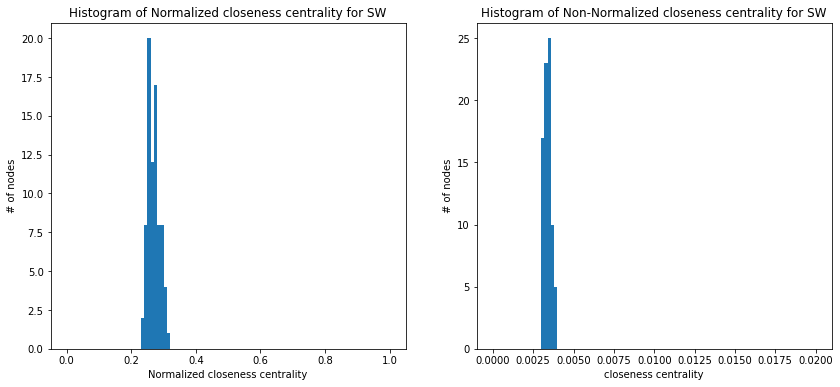

football
Average closeness centrality: 0.00350279893203388
Variance of closeness centrality: 1.8941623700803334e-08
Average normalized closeness centrality: 0.39931907825186225
Variance of normalized closeness centrality: 0.0002461653416156402


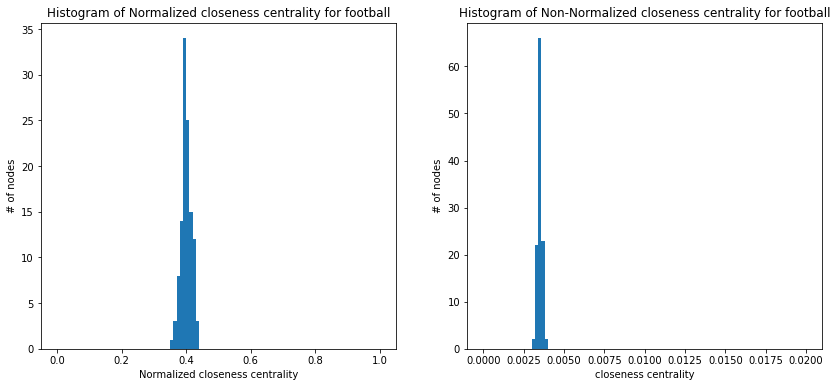

got
Average closeness centrality: 0.0027038280070458267
Variance of closeness centrality: 1.905406281307303e-07
Average normalized closeness centrality: 0.31905170483140755
Variance of normalized closeness centrality: 0.002653087706092289


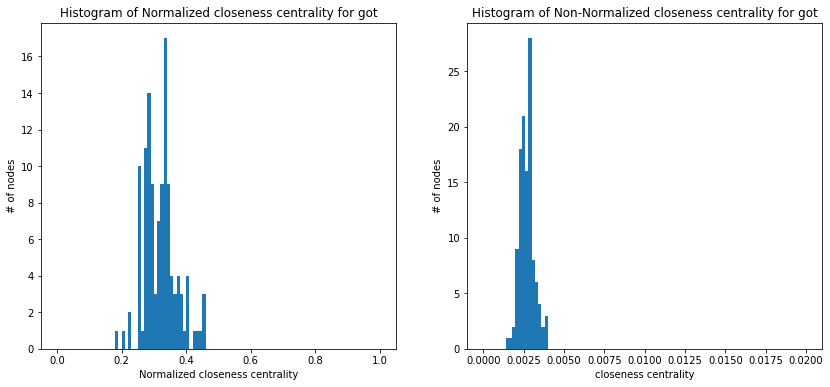

eu_comp
Average closeness centrality: 0.00040047110782608764
Variance of closeness centrality: 3.0794106547523917e-09
Average normalized closeness centrality: 0.39446404120869627
Variance of normalized closeness centrality: 0.002987721202507139


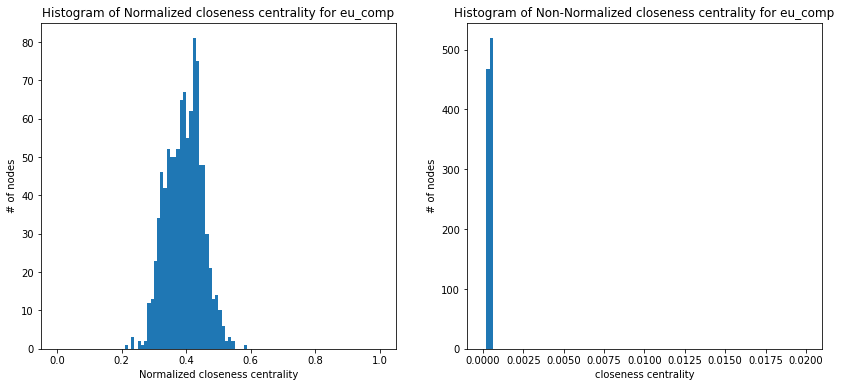

In [13]:
for(name,G) in graphs:
    find_closeness(name,G)

### Παρατησεις
* Γράφος Football <br>
Ο συγκεκριμένος γράφος παρουσιάζει χαρακτηριστικά κυριως από RGEG αλλά και SW. Η ομοιότητα με τον RGER φαίνεται από την οπτικοποίηση του γράφου και από την ανάλυση για το degree centrality και το closeness centrality του γράφου. Από την άλλη, η ανάλυση για τα clustering coefficients για τον γράφο football μοιάζει περισσότερο με αυτή για τον SW. <br><br>

* Γράφος GoT <br>
Ο συγκεκριμένος γράφος είναι RGG και αυτό φαίνεται ξεκάθαρα όταν ο γράφος οπτικοποιείται. Πέρα από αυτό τόσο τα γραφήματα όσο και οι μέσες τιμές για degree centrality, clustering coefficients και closeness centrality μοιάζουν πολύ με αυτές του αντίστοιχου συνθετικού γράφου. <br><br>

* Γράφος eu <br>
Ο συγκεκριμένος γράφος είναι SF. Αυτό φαίνεται κυρίως από την ανάλυση για το degree centrality όπου τιμές και γραφημα έμοιαζαν πολύ με του συνθετικού SF αλλά και με το θεωρητικό γράφημα για SF που είδαμε στη θεωρία του μαθήματος. Όπως και στην περίπτωση του GoT γράφου και σε αυτή την περίπτωση η ανάλυση για το closeness centrality μοιάζει πολύ με την αντίστοιχη θεωρητική αλλά δεν ισχύει το ίδιο για την ανάλυση για τα clustering coefficients.


## B. Εξοικείωση με τα εργαλεία εντοπισμού κοινοτήτων
<ol>
<li>Χρησιμοποιώντας τις συναρτήσεις του <b>πίνακα 2</b> για κάθε <u>πραγματικό</u> (<b>πίνακας 1</b>) και <u>συνθετικό</u> (από την <b>άσκηση 1</b>) δίκτυο:</p>
<ol>
    <li>να οπτικοποιηθούν οι κοινότητες που προκύπτουν από την κάθε μέθοδο,</li>
    <li>να γίνουν οι απαραίτητοι σχολιασμοί (π.χ: σύγκριση του αριθμού των κοινοτήτων που υπολογίζει ο κάθε αλγόριθμος).</li>
</ol>
<p>Για την οπτικοποίηση, να επισημανθεί διαφορετικά κάθε κοινότητα, π.χ. με διαφορετικό χρώμα.</p>
<p style=text-align:justify>Στην περίπτωση των συνθετικών δικτύων, να πραγματοποιηθούν συγκρίσεις και μεταξύ των διαφορετικών τύπων τοπολογιών. Για παράδειγμα, στην περίπτωση του τυχαίου γεωμετρικού γράφου, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.</p>
<li>Για κάθε αλγόριθμο εντοπισμού κοινοτήτων και για κάθε τοπολογία αξιολογήστε την ποιότητα της διαμέρισης με τις μετρικές performance και modularity (<a style=text-decoration:none href='https://networkx.org/documentation/stable/reference/algorithms/community.html#module-networkx.algorithms.community.quality'>measuring_partitions</a>). Για την μετρική performance, θα χρησιμοποιήσετε την συνάρτηση partition_quality του networkx.</li>
<li>Για την μεγαλύτερη συνδεδεμένη συνιστώσα του email-Eu-core, να συγκρίνετε την ground-truth διαμέριση που δίνεται στο αρχείο Email-Eu-core-department-labels.txt με τις διαμερίσεις που προκύπτουν από τις εξεταζόμενες μεθόδους ως προς το πλήθος των παραγόμενων κοινοτήτων και ως προς τις μετρικές performance και modularity. </li>
<li>Για την παρακολούθηση του χρόνου εκτέλεσης της υλοποίησής σας, μπορείτε να χρησιμοποιήσετε την βιβλιοθήκη <a style=text-decoration:none href='https://tqdm.github.io/'>tqdm</a>. Στο σχολιασμό σας να λάβετε υπόψη το trade-off της ποιότητας της διαμέρισης και του χρόνου εκτέλεσης των εξεταζόμενων αλγορίθμων. </li>
</ol>

<table style=float:left;width:70%>
    <caption>Πίνακας <b>2</b>: Συναρτήσεις εντοπισμού κοινοτήτων</caption>
    <tr>
        <th style=text-align:left> Μέθοδος εντοπισμού κοινοτήτων</th>
        <th style=text-align:left>Συνάρτηση</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

<p style=text-align:justify>Προτού εφαρμόσετε τις συναρτήσεις εντοπισμού κοινοτήτων μελετήστε προσεκτικά την <b>είσοδο που απαιτούν καθώς και τη μορφή εξόδου που παράγουν.</b></p>

In [14]:
#Χρησιμοποιήστε την συνάρτηση conv2int για να μετατρέψετε τα labels των κόμβων στις πραγματικές τοπολογίες σε integers
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping=dict(enumerate(G.nodes,0))
    return nG,G_mapping

<h4> Ορισμός χρωμάτων για την οπτικοποίηση των κοινοτήτων.</h4>

In [15]:
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())
colors.remove('w')
colors.remove('white')
colors.remove('b')
colors.remove('black')

Παρατηρήσεις:
* Μετρική Modularity


Για κάθε κοινότητα επιλέγει όλα τα πιθανά ζεύγη κόμβων, έστω i και j, που ανήκουν σε αυτή και αν η ακμή μεταξύ των i και j υπάρχει τότε προσθέτει στο συνολικό άθροισμα τη διαφορά 1 πλήν την πιθανότητα να υπάρχει αυτή η ακμή (που είναι ίση με το γινόμενο των βαθμών των δύο κόμβων διά το συνολικό αριθμό half-edges $ \frac{d_i d_j}{2m}  $ ). Αν η ακμή δεν υπάρχει απλά αφαιρεί την πιο πάνω πιθανότητα από το συνολικό άθροισμα. Αν η τιμή είναι κοντά στο 1 τότε η διαμέριση σε κοινότητες έγινε πολύ σωστά ενώ αν η τιμή είναι αρνητική τότε η διαμέριση σε κοινότητες δεν είναι καθόλου σωστή.
* Μετρική Performance


Το αποτέλεσμα της μετρικής είναι ένα κλάσμα που στον παρονομαστή έχει το πλήθος των πιθανών ακμών που θα μπορούσαν να υπάρχουν για γράφο με n κόμβους (δλδ $ n \choose 2 $ $ = n(n-1)/2$ ). Ο αριθμητής είναι το άθροισμα όλων των ακμών που ενώνουν κόμβους εντός των ίδιων κοινοτήτων και όλων των ακμών που δεν υπάρχουν και αν υπήρχαν θα ένωναν κόμβους διαφορετικών κοινοτήτων


### Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Newman-Girvan.
<p>Παράξτε τις διαμερίσεις που προκύπτουν από την μέθοδο Newman-Girvan. Ελέγξτε τις διαμερίσεις που έχουν μέχρι και 50 κοινότητες.</p> 
<p> Επιλέξτε τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

In [16]:
k = 50

def find_girvan_newman(G):

    best_modularity_val = -1
    best_performance_val = 0
    best_modularity = []
    best_performance = []

    coms = nx.algorithms.community.centrality.girvan_newman(G)

    for com in itertools.islice(coms, k-1):
        temp_modularity = nx.algorithms.community.quality.modularity(G,com)
        temp_performance = nx.algorithms.community.quality.partition_quality(G,com)[1]
        if(temp_modularity > best_modularity_val):
            best_modularity_val = temp_modularity
            best_modularity = com
        if(temp_performance > best_performance_val):
            best_performance_val = temp_performance
            best_performance = com  
    return(best_modularity,best_performance,best_modularity_val,best_performance_val)




In [17]:
girvan_newman_ans = []
for (name, graph) in tqdm(graphs):
    (bm,bp,bmv,bpv) = find_girvan_newman(graph)
    girvan_newman_ans.append((name,bm,bp,bmv,bpv))
    print(name)
    print('Best modularity for ' + str(len(bm)) + ' communities with a value of: ' + str(bmv))
    print('Best performance for ' + str(len(bp)) + ' communities with a value of ' + str(bpv))

 12%|█▎        | 1/8 [00:00<00:03,  2.00it/s]

REG
Best modularity for 8 communities with a value of: 0.7249999999999999
Best performance for 16 communities with a value of 0.9696202531645569


 25%|██▌       | 2/8 [00:04<00:13,  2.27s/it]

RGER
Best modularity for 24 communities with a value of: 0.21109444444444445
Best performance for 34 communities with a value of 0.9215189873417722


 38%|███▊      | 3/8 [00:06<00:12,  2.49s/it]

RGG
Best modularity for 5 communities with a value of: 0.5970493827160495
Best performance for 22 communities with a value of 0.9291139240506329


 50%|█████     | 4/8 [00:10<00:12,  3.00s/it]

SF
Best modularity for 30 communities with a value of: 0.13638331024930742
Best performance for 43 communities with a value of 0.9174050632911392


 62%|██████▎   | 5/8 [00:11<00:06,  2.22s/it]

SW
Best modularity for 8 communities with a value of: 0.5741015625
Best performance for 31 communities with a value of 0.9670886075949368


 75%|███████▌  | 6/8 [00:20<00:08,  4.47s/it]

football
Best modularity for 10 communities with a value of: 0.5996290274077957
Best performance for 17 communities with a value of 0.9581998474446987


 88%|████████▊ | 7/8 [00:23<00:04,  4.11s/it]

got
Best modularity for 8 communities with a value of: 0.6681205999387817
Best performance for 50 communities with a value of 0.96425010682239


100%|██████████| 8/8 [13:22<00:00, 100.36s/it]

eu_comp
Best modularity for 2 communities with a value of: 0.0006218821799455388
Best performance for 50 communities with a value of 0.13940548388093205


### Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Spectral Clustering.
Προσοχή! Για την επιλογή της τιμής της παραμέτρου που αφορά στην διάσταση του projection subspace (n_clusters) της συνάρτησης SpectralClustering, θα πρέπει να λάβετε υπόψη το μέγεθος |V| του εκάστοτε δικτύου.
<p>Να εξετάσετε τις διαμερίσεις που προκύπτουν για n_clusters$=2,...,|V|$. Να επιλέξετε για οπτικοποίηση τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

In [18]:
def find_spectral_clustering(G):

    best_modularity_val = -1
    best_performance_val = 0
    best_modularity = []
    best_performance = []

    nodes = list(G.nodes())
    adjacencyMatrix = nx.to_numpy_array(G)

    for i in range(1, k):
        com = dict()
        sc = SpectralClustering(n_clusters = i, affinity = "precomputed").fit(adjacencyMatrix)
        for x in np.unique(sc.labels_):
            com[x] = list()
        for x in range(len(sc.labels_)):
            com[sc.labels_[x]].append(nodes[x])

        temp_modularity = nx.algorithms.community.quality.modularity(G,com.values())
        temp_performance = nx.algorithms.community.quality.partition_quality(G,com.values())[1]
        if(temp_modularity > best_modularity_val):
            best_modularity_val = temp_modularity
            best_modularity = com.values()
        if(temp_performance > best_performance_val):
            best_performance_val = temp_performance
            best_performance = com.values()  

    return(best_modularity,best_performance,best_modularity_val,best_performance_val)


In [19]:
spectral_clustering_ans = []
for (name, graph) in tqdm(graphs):
    (bm,bp,bmv,bpv) = find_spectral_clustering(graph)
    spectral_clustering_ans.append((name,bm,bp,bmv,bpv))
    print(name)
    print('Best modularity for ' + str(len(bm)) + ' communities with a value of: ' + str(bmv))
    print('Best performance for ' + str(len(bp)) + ' communities with a value of ' + str(bpv))

 12%|█▎        | 1/8 [00:06<00:44,  6.29s/it]

REG
Best modularity for 7 communities with a value of: 0.7256250000000001
Best performance for 21 communities with a value of 0.9743670886075949


 25%|██▌       | 2/8 [00:12<00:36,  6.07s/it]

RGER
Best modularity for 9 communities with a value of: 0.28374444444444447
Best performance for 22 communities with a value of 0.9145569620253164


 38%|███▊      | 3/8 [00:18<00:30,  6.04s/it]

RGG
Best modularity for 6 communities with a value of: 0.6021827160493828
Best performance for 11 communities with a value of 0.9357594936708861


 50%|█████     | 4/8 [00:24<00:24,  6.01s/it]

SF
Best modularity for 4 communities with a value of: 0.26802177112188363
Best performance for 33 communities with a value of 0.9120253164556962


 62%|██████▎   | 5/8 [00:30<00:17,  5.97s/it]

SW
Best modularity for 6 communities with a value of: 0.55951171875
Best performance for 30 communities with a value of 0.9667721518987342


 75%|███████▌  | 6/8 [00:36<00:12,  6.23s/it]

football
Best modularity for 11 communities with a value of: 0.6022010863056825
Best performance for 16 communities with a value of 0.9581998474446987


 88%|████████▊ | 7/8 [00:43<00:06,  6.42s/it]

got
Best modularity for 7 communities with a value of: 0.6654167942046729
Best performance for 25 communities with a value of 0.9481555333998006


100%|██████████| 8/8 [01:11<00:00,  8.96s/it]

eu_comp
Best modularity for 11 communities with a value of: 0.340250119495251
Best performance for 31 communities with a value of 0.8630841939436373


### Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Modularity Maximization.
Για την διαμέριση που θα προκύψει σε κάθε συνθετικό και πραγματικό δίκτυο, να υπολογίσετε το modularity score και το performance score.

In [20]:

def find_greedy_modularity_communities(G):
    com = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
    modularity = nx.algorithms.community.quality.modularity(G,com)
    performance = nx.algorithms.community.quality.partition_quality(G,com)[1]
    return(com,modularity,performance)

In [21]:
modularity_max_ans = []
for (name, graph) in tqdm(graphs):
    (com,bmv,bpv) = find_greedy_modularity_communities(graph)
    modularity_max_ans.append((name,com,bmv,bpv))
    print(name)
    print('Modularity Maximazation algorithm returns ' + str(len(com)) + ' comunities')
    print('Modularity value ' + str(bmv))
    print('Performance value ' + str(bpv))


  0%|          | 0/8 [00:00<?, ?it/s]

REG
Modularity Maximazation algorithm returns 4 comunities
Modularity value 0.673125
Performance value 0.8006329113924051
RGER
Modularity Maximazation algorithm returns 4 comunities
Modularity value 0.28364999999999996
Performance value 0.7591772151898735
RGG

 50%|█████     | 4/8 [00:00<00:00, 33.99it/s]


Modularity Maximazation algorithm returns 4 comunities
Modularity value 0.5853728395061728
Performance value 0.8291139240506329
SF
Modularity Maximazation algorithm returns 5 comunities
Modularity value 0.27000194771468145
Performance value 0.7939873417721519
SW
Modularity Maximazation algorithm returns 8 comunities
Modularity value 0.563203125
Performance value 0.9003164556962026
football
Modularity Maximazation algorithm returns 6 comunities
Modularity value 0.5564043335134086
Performance value 0.8684973302822273
got
Modularity Maximazation algorithm returns 5 comunities
Modularity value 0.660477884909703
Performance value 0.829796325309785


100%|██████████| 8/8 [00:05<00:00,  1.43it/s]

eu_comp
Modularity Maximazation algorithm returns 8 comunities
Modularity value 0.3471325650460906
Performance value 0.7078716240565892


### Παρατηρήσεις για τις πιο πάνω διαμερίσεις

#### Σύγκριση αριθμού κοινοτήτων για κάθε συνδυασμό γράφου - αλγορίθμου - μετρικής

In [22]:
data = []
GN_mod = [len(girvan_newman_ans[i][1]) for i in range(8)]
GN_per = [len(girvan_newman_ans[i][2]) for i in range(8)]
SC_mod = [len(spectral_clustering_ans[i][1]) for i in range(8)]
SC_per = [len(spectral_clustering_ans[i][2]) for i in range(8)]
MM = [len(modularity_max_ans[i][1]) for i in range(8)]
          
data.append(GN_mod)
data.append(GN_per)
data.append(SC_mod)
data.append(SC_per)
data.append(MM)

print("# of communities")
pd.DataFrame(data, index = ["GN_Modularity", "GN_Performance","SC_Modularity", "SC_Performance","MM"], columns = [graphs[i][0] for i in range(8)])

# of communities


REG  RGER  RGG  SF  SW  football  got  eu_comp
GN_Modularity     8    24    5  30   8        10    8        2
GN_Performance   16    34   22  43  31        17   50       50
SC_Modularity     7     9    6   4   6        11    7       11
SC_Performance   21    22   11  33  30        16   25       31
MM                4     4    4   5   8         6    5        8

Παρατηρήσεις
* Σε κάθε περίπτωση για τον ίδιο συνδυασμό γράφου - αλγορίθμου, η μετρική performance δίνει σημαντικά μεγαλύτερο αριθμό από κοινότητες
* Ο συνδυασμός του αλγόριθμου SC με modularity και ο ΜΜ δίνουν απαντήσεις σε μικρό εύρος τιμών ανεξάρτητα από τον γράφο
* Για τον γράφο got γνωρίζουμε από την [ιστοσελίδα](https://networkofthrones.wordpress.com/the-series/season-5/) ότι αποτελείται από 6 κοινότητες, ωστόσο κανένας από τους παραπάνω συνδυασμούς δεν δίνει αποτέλεσμα 6 αλλά ο αλγόριθμος modularity maximazation καθώς και οι συνδυασμοί με μετρική modularity δίνουν κοντινές απαντήσεις
* Για κανένα γράφο οι συνδυασμοί αλγορίθμων - μετρικών δεν δίνουν κοντινά αποτελέσματα, συγκεκριμένα για τον γράφο eu_comp οι διαφορετικοί συνδυασμοί αλγορίθμων - μετρικών έχουν πάρα πολύ μεγάλη απόκλιση στις απαντήσεις τους

#### Σύγκριση τιμής Modularity για κάθε συνδυασμό γράφου - αλγορίθμου

In [23]:
data = []
GN_mod_v = [girvan_newman_ans[i][3] for i in range(8)]
SC_mod_v = [spectral_clustering_ans[i][3] for i in range(8)]
MM_v = [modularity_max_ans[i][2] for i in range(8)]
          
data.append(GN_mod_v)
data.append(SC_mod_v)
data.append(MM_v)

print("Modularity")
pd.DataFrame(data, index = ["GN_Modularity", "SC_Modularity", "MM"], columns = [graphs[i][0] for i in range(8)])

Modularity


REG      RGER       RGG        SF        SW  football  \
GN_Modularity  0.725000  0.211094  0.597049  0.136383  0.574102  0.599629   
SC_Modularity  0.725625  0.283744  0.602183  0.268022  0.559512  0.602201   
MM             0.673125  0.283650  0.585373  0.270002  0.563203  0.556404   

                    got   eu_comp  
GN_Modularity  0.668121  0.000622  
SC_Modularity  0.665417  0.340250  
MM             0.660478  0.347133

#### Παρατηρήσεις για το Modularity
* Σε καμία περίπτωση δεν υπάρχει αρνητική τιμή modularity επομένως οι διαμερίσεις είναι γενικώς καλές
* Ο GN καθυστερεί πολύ περισσότερο από τους άλλους δύο αλλά έχει σταθερά χειρότερα αποτελέσματα από τον SC επομένως, για τους συγκεκριμένους γράφους και για τη μετρική modularity, δεν έχει κανένα ουσιαστικό πλεονέκτημα
* Μεγαλύτερες τιμές modularity έχει ο γράφος REG, όμως γνωρίζουμε ότι κάθε διαμέριση για τον REG είναι σχετική αφού όλοι οι κόμβοι έχουν βαθμό και μορφή άρα οποιοδήποτε διαμέριση με διαδοχικούς κόμβους θα έδινε καλό αποτέλεσμα
* Χειρότερη τιμή με διαφορά έχει ο αλγόριθμος GN για τον γράφο eu_comp
* Γενικά οι αλγόριθμοι SC και MM έχουν καλύτερα αποτελέσματα από τον GN, είδικά αν αναλογιστεί κανείς ότι ο GN χρειάζεται χρόνο τάξεις μεγέθους μεγαλύτερο από τους άλλους δύο
* Οι διαμερίσεις για τον RGG είναι αρκετά καλές και αυτό οφείλεται στο γεγονός ότι η μορφή του γράφου δημιουργεί εξ ορισμού εμφανείς κοινότητες
* Ο γράφος SF έχει κατά μέσο όρο τα χειρότερα αποτελέσματα
* Οι τιμές για το γράφο got μοιάζουν με αυτές του RGG
* Οι τιμές για τον γράφο eu_comp μοιάζουν με αυτές του SF

#### Σύγκριση τιμής Performance για κάθε συνδυασμό γράφου - αλγορίθμου

In [24]:
data = []
GN_mod_p = [girvan_newman_ans[i][4] for i in range(8)]
SC_mod_p = [spectral_clustering_ans[i][4] for i in range(8)]
MM_p = [modularity_max_ans[i][3] for i in range(8)]
          
data.append(GN_mod_p)
data.append(SC_mod_p)
data.append(MM_p)

print("Perfomance")
pd.DataFrame(data, index = ["GN_Perfomance", "SC_Perfomance", "MM"], columns = [graphs[i][0] for i in range(8)])

Perfomance


REG      RGER       RGG        SF        SW  football  \
GN_Perfomance  0.969620  0.921519  0.929114  0.917405  0.967089  0.958200   
SC_Perfomance  0.974367  0.914557  0.935759  0.912025  0.966772  0.958200   
MM             0.800633  0.759177  0.829114  0.793987  0.900316  0.868497   

                    got   eu_comp  
GN_Perfomance  0.964250  0.139405  
SC_Perfomance  0.948156  0.863084  
MM             0.829796  0.707872

#### Παρατηρήσεις για το Performance
* Για τη μετρική performance, με εξαίρεση την τιμή για τον γράφο eu με αλγόριθμο GN, σε κάθε περίπτωση η τιμή performance είναι αρκετά ψηλή
* Ο GN καθυστερεί πολύ περισσότερο από τους άλλους δύο αλλά δεν έχει καλύτερα αποτελέσματα από τον SC επομένως, επομένως η χρησιμοποίηση αυτού του αλγορίθμου σε αυτή την περίπτωση δεν προσφέρει κάποιο σημαντικό πλεονέκτημα
* Ο αλγόριθμος ΜΜ έχει τα χειρότερα αποτελέσματα από κάθε άλλο αλγόριθμο
* Ο γράφος eu έχει τα χειρότερα αποτελέσματα από κάθε άλλο γράφο
* Ισχύει και σε αυτή την περίπτωση ότι οι διαμερίσεις για τον RGG είναι αρκετά καλές και αυτό οφείλεται στο γεγονός ότι η μορφή του γράφου δημιουργεί εξ ορισμού εμφανείς κοινότητες
* Οι τιμές για το γράφο got μοιάζουν με αυτές του RGG

### Σύγκριση με την ground-truth διαμέριση

In [25]:
com = dict()
with open('email-Eu-core-department-labels.txt') as openfileobject:
    for line in openfileobject:
        args = line.split(' ')
        node_no = str(args[0])
        com_no = int(args[1])
        if(node_no in graphs[7][1].nodes):
            if(com_no not in com.keys()):
                com[com_no] = []
            com[com_no].append(node_no)

ground_truth_modularity = nx.algorithms.community.quality.modularity(graphs[7][1],com.values())
ground_truth_performance = nx.algorithms.community.quality.partition_quality(graphs[7][1],com.values())[1]
ground_truth_coms = com.values()
print(ground_truth_modularity)
print(ground_truth_performance)

0.28801318862374214
0.9428136036490563


In [26]:
data = []
modularities = [len(girvan_newman_ans[7][1]), len(spectral_clustering_ans[7][1]), len(modularity_max_ans[7][1]),  len(ground_truth_coms)]
performances = [len(girvan_newman_ans[7][2]), len(spectral_clustering_ans[7][2]), '-',  '-']
data.append(modularities)
data.append(performances)
print('number of communities')
pd.DataFrame(data, index = ["Modularity", "Performance"], columns = ["Girvan-Newman", "Spectral Clustering", "Modularity Max", "Ground Truth"])

number of communities


Girvan-Newman  Spectral Clustering Modularity Max Ground Truth
Modularity               2                   11              8           42
Performance             50                   31              -            -

In [27]:
data = []
modularities = [girvan_newman_ans[7][3], spectral_clustering_ans[7][3], modularity_max_ans[7][2], ground_truth_modularity]
performances = [girvan_newman_ans[7][4], spectral_clustering_ans[7][4], modularity_max_ans[7][3], ground_truth_performance]
data.append(modularities)
data.append(performances)
pd.DataFrame(data, index = ["Modularity", "Performance"], columns = ["Girvan-Newman", "Spectral Clustering", "Modularity Max", "Ground Truth"])

Girvan-Newman  Spectral Clustering  Modularity Max  Ground Truth
Modularity        0.000622             0.340250        0.347133      0.288013
Performance       0.139405             0.863084        0.707872      0.942814

Παρατηρήσεις
* Κανένας από τους πιο πάνω αλγορίθμους δεν βρίσκει τη λύση του Ground Truth με 42 κοινότητες. Εξάλλου δεν υπάρχει ούτε και κάποια πολύ κοντινή λύση
* Οι αλγόριθμοι SC και MM δίνουν καλύτερο αποτέλεσμα από την ground truth λύση για τη μετρική modularity
* Κανένας αλγόριθμος δεν πετυχαίνει ίδιο ή παρόμοιο αποτέλεσμα με τη ground truth για τη μετρική performance
* Φαίνεται ξανά ότι ο, χρονικά κοστοβόρος, GN δεν έχει κανένα πλεονέκτημα σε σχέση με τους υπόλοιπους αλγορίθμους

### Οπτικοποίηση κοινοτήτων

In [28]:
def visualize(G,coms,pos):
    plt.figure(figsize=(10, 10))
    # pos = nx.circular_layout(G)
    # pos = nx.spring_layout(G)
    # pos = nx.fruchterman_reingold_layout(G)
    nx.draw_networkx_edges(G, pos=pos, alpha=0.3)
    for (nodes,i) in zip(coms,range(len(coms))):
        n = nx.draw_networkx_nodes(G, pos=pos ,nodelist=nodes ,node_color=colors[i], node_size=50)
        n.set_edgecolor('black')

In [29]:
def GN_mod(idx,pos):
    print(graphs[idx][0] + ': Girvan-Newman algorithm based on modularity gives ' + str(len(girvan_newman_ans[idx][1])) + 
        ' communities with a modularity value of: ' + str(girvan_newman_ans[idx][3]))
    visualize(graphs[idx][1],girvan_newman_ans[idx][1],pos)

def GN_per(idx,pos):
    print(graphs[idx][0] + ': Girvan-Newman algorithm based on performance gives ' + str(len(girvan_newman_ans[idx][2])) + 
        ' communities with a performance value of: ' + str(girvan_newman_ans[idx][4]))
    visualize(graphs[idx][1],girvan_newman_ans[idx][2],pos)

def SC_mod(idx,pos):
    print(graphs[idx][0] + ': Spectral Clustering algorithm based on modularity gives ' + str(len(spectral_clustering_ans[idx][1])) + 
        ' communities with a modularity value of: ' + str(spectral_clustering_ans[idx][3]))
    visualize(graphs[idx][1],spectral_clustering_ans[idx][1],pos)

def SC_per(idx,pos):
    print(graphs[idx][0] + ': Spectral Clustering algorithm based on performance gives ' + str(len(spectral_clustering_ans[idx][2])) + 
        ' communities with a performance value of: ' + str(spectral_clustering_ans[idx][4]))
    visualize(graphs[idx][1],spectral_clustering_ans[idx][2],pos)

def MM(idx,pos):
    print(graphs[idx][0] + ': Modularity Maximazation algorithm gives ' + str(len(modularity_max_ans[idx][1])) + 
        ' communities with a modularity value of: ' + str(modularity_max_ans[idx][2]) +
        ' and a performance value of: ' + str(modularity_max_ans[idx][3]))
    visualize(graphs[idx][1],modularity_max_ans[idx][1],pos)

#### Οπτικοποίηση κοινοτήτων American College Football

In [30]:
pos_football = nx.fruchterman_reingold_layout(graphs[5][1])

football: Girvan-Newman algorithm based on modularity gives 10 communities with a modularity value of: 0.5996290274077957


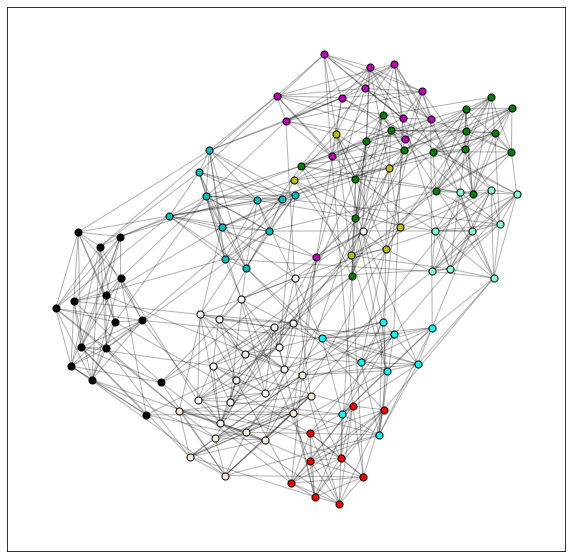

In [31]:
GN_mod(5,pos_football)

football: Girvan-Newman algorithm based on performance gives 17 communities with a performance value of: 0.9581998474446987


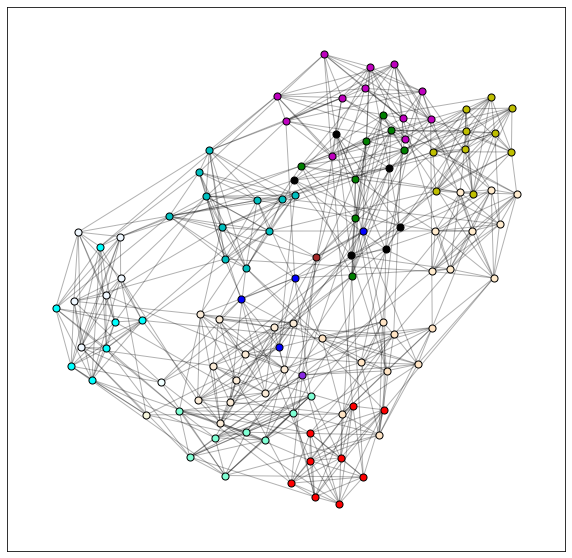

In [32]:
GN_per(5,pos_football)

football: Spectral Clustering algorithm based on modularity gives 11 communities with a modularity value of: 0.6022010863056825


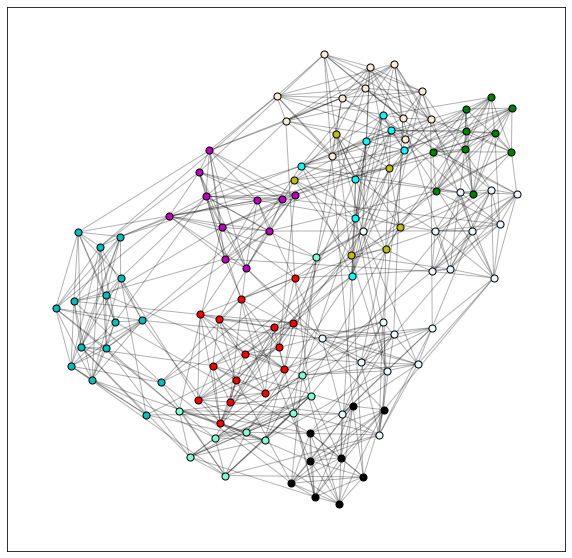

In [33]:
SC_mod(5,pos_football)

football: Spectral Clustering algorithm based on performance gives 16 communities with a performance value of: 0.9581998474446987


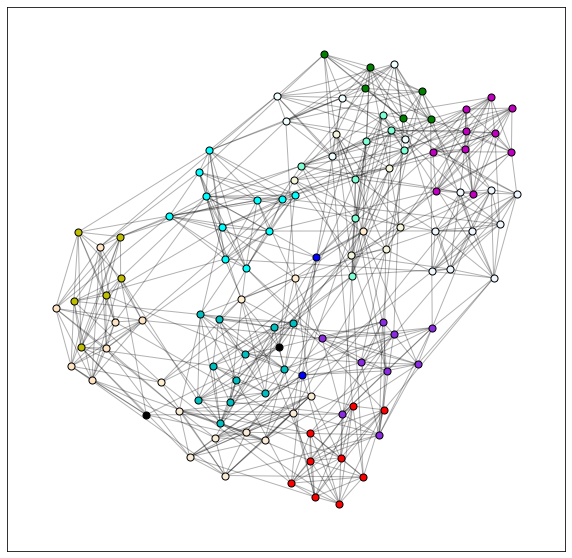

In [34]:
SC_per(5,pos_football)

football: Modularity Maximazation algorithm gives 6 communities with a modularity value of: 0.5564043335134086 and a performance value of: 0.8684973302822273


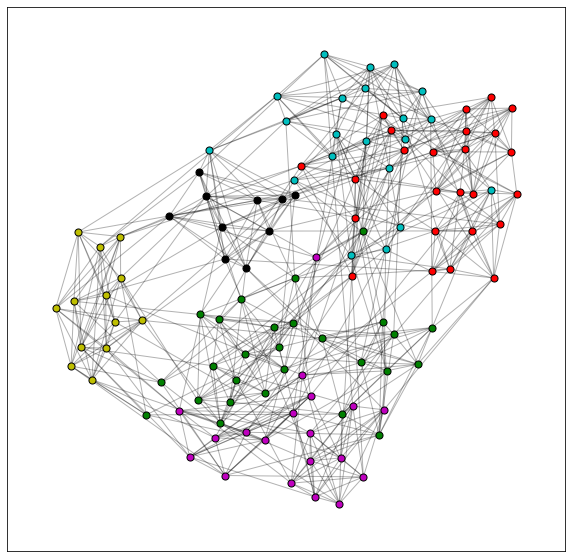

In [35]:
MM(5,pos_football)

Παρατηρήσεις
> Για τον γράφο football φαίνεται στη [σελίδα](https://networkx.org/documentation/stable/auto_examples/graph/plot_football.html?fbclid=IwAR0eEFbDRUySIe8LKPWs3SIVNVF9kbGR1uz5veFnPv9Cs5_WcquAYMQj_4I) και στη [σελίδα](http://snap.stanford.edu/agm/?fbclid=IwAR3tBPWGVIXp9ZXuV01NApZfugV7Uz3rpEqpWiNB8ws2LB1Umdj4Orko3lo) ότι στην πραγματικότητα υπάρχουν 12 κοινότητες κάτι το οποίο κανέας από τους πιο πάνω συνδυασμούς δεν καταφέρνει να εντοπίσει. Παρόλα αυτά από τις πιο πάνω οπτικοποιήσεις φαίνεται να υπάρχουν 6-7 ξεκάθαρες κοινότητες στα άκρα της κάθε εικόνας τις οποίες όλοι οι συνδυασμοί εντοπίζουν. Χειρότερος από όλους μοιάζει να είναι ο συνδυασμός SC - performance που δίνει και τις περισσότερες κοινότητες.

#### Οπτικοποίηση κοινοτήτων Game of Thrones

In [36]:
pos_got = nx.fruchterman_reingold_layout(graphs[6][1])

got: Girvan-Newman algorithm based on modularity gives 8 communities with a modularity value of: 0.6681205999387817


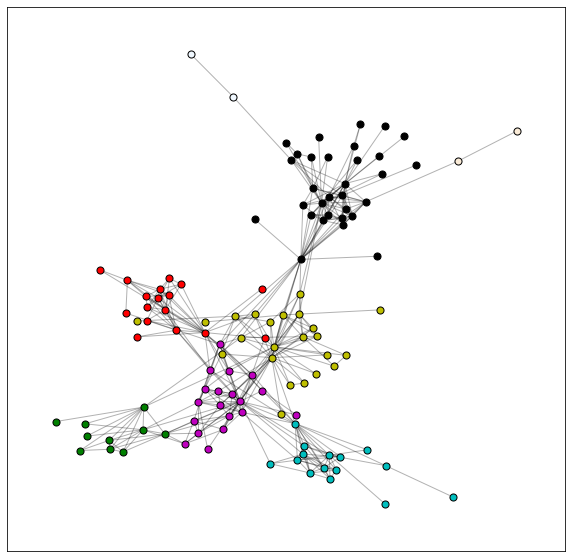

In [37]:
GN_mod(6,pos_got)

got: Girvan-Newman algorithm based on performance gives 50 communities with a performance value of: 0.96425010682239


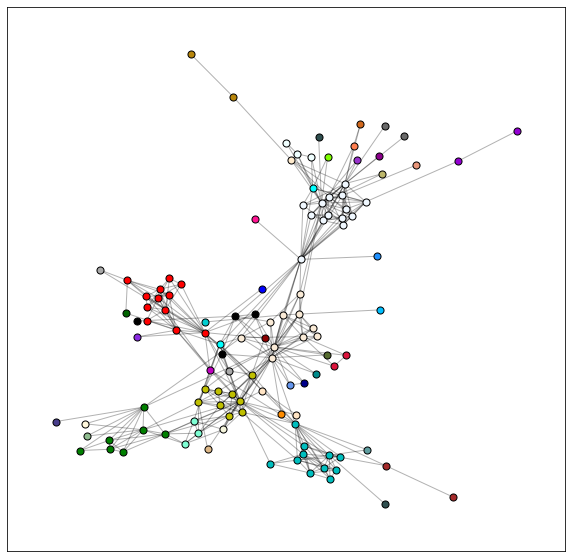

In [38]:
GN_per(6,pos_got)

got: Spectral Clustering algorithm based on modularity gives 7 communities with a modularity value of: 0.6654167942046729


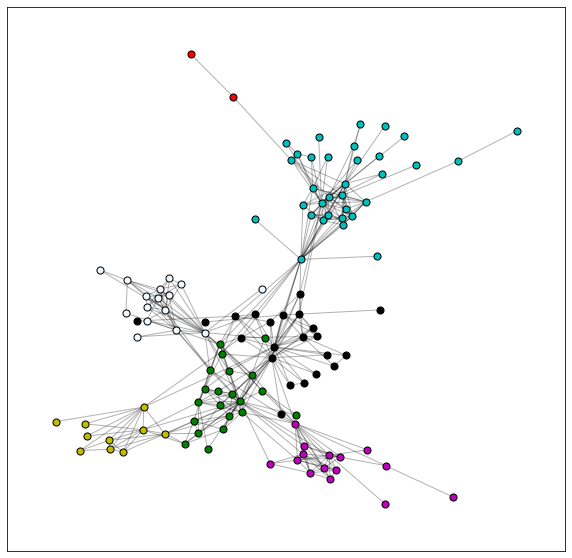

In [39]:
SC_mod(6,pos_got)

got: Spectral Clustering algorithm based on performance gives 25 communities with a performance value of: 0.9481555333998006


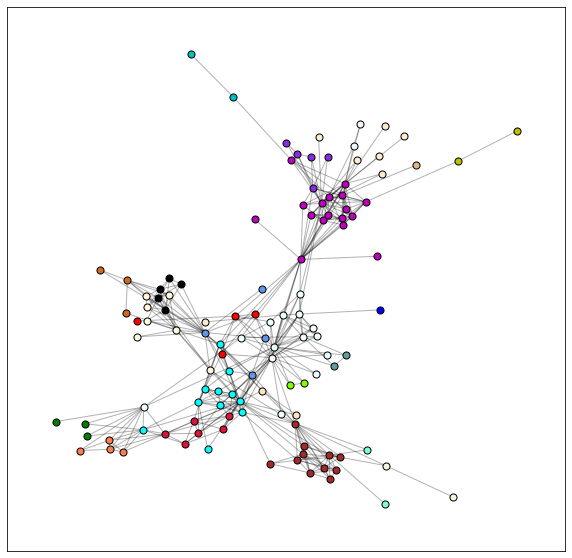

In [40]:
SC_per(6,pos_got)

got: Modularity Maximazation algorithm gives 5 communities with a modularity value of: 0.660477884909703 and a performance value of: 0.829796325309785


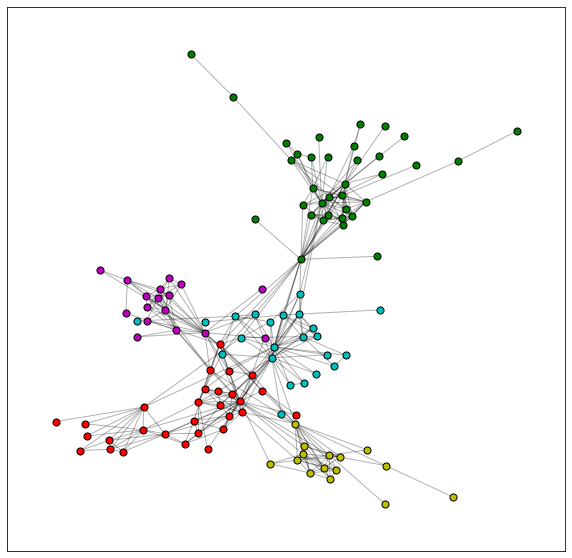

In [41]:
MM(6,pos_got)

Παρατηρήσεις
> Ο γράφος got φαίνεται να έχει ξεκάθαρες κοινότητες (όπως και ο RGG). Όπως προαναφέρθηκε, γνωρίζουμε εκ των προτέρων ότι οι κοινότητες είναι 6 όμως κανένας από τους πιο πάνω συνδυασμούς δεν εντοπίζει τόσες ακριβώς κοινότητες. Πιο κοντά στη λύση φαίνεται να είναι ο ΜΜ και ο συνδυασμός SC - modularity που φαίνεται και οπτικά να έχουν χωρίσει τον γράφο σε αποδεκτές κοινότητες. Από την άλλη οι συνδυασμοί που χρησιμοποιούν μετρική performance δίνουν εμφανώς λανθασμένα αποτελέσματα και υπερβολικά μεγάλους αριθμούς κοινοτήτων

#### Οπτικοποίηση κοινοτήτων email-Eu-core (να οπτικοποιηθεί και η ground-truth διαμέριση)

In [42]:
pos_eu = nx.fruchterman_reingold_layout(graphs[7][1])

eu_comp: Girvan-Newman algorithm based on modularity gives 2 communities with a modularity value of: 0.0006218821799455388


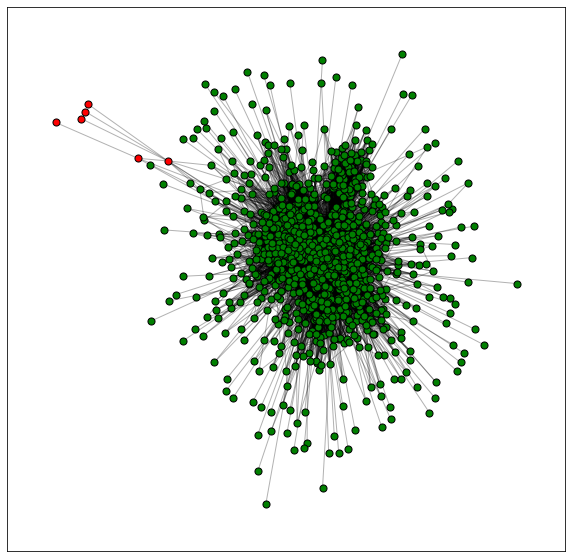

In [43]:
GN_mod(7,pos_eu)

eu_comp: Girvan-Newman algorithm based on performance gives 50 communities with a performance value of: 0.13940548388093205


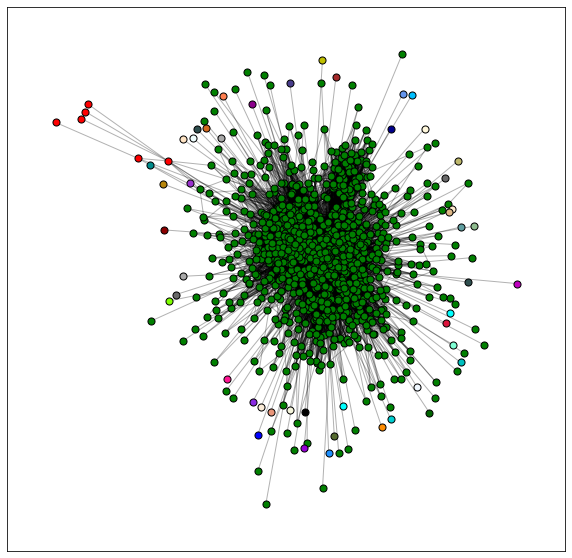

In [44]:
GN_per(7,pos_eu)

eu_comp: Spectral Clustering algorithm based on modularity gives 11 communities with a modularity value of: 0.340250119495251


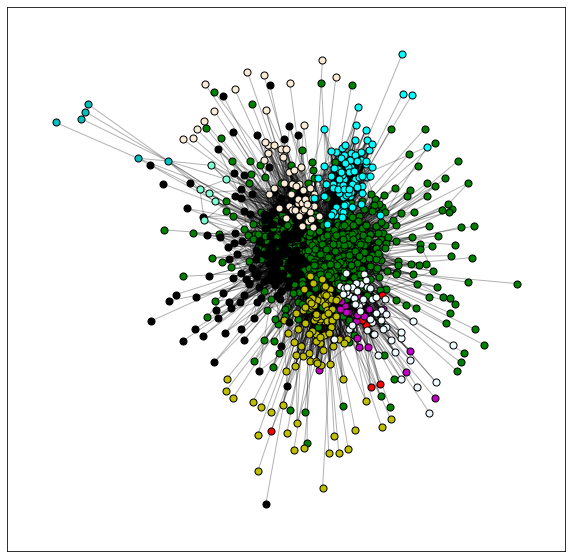

In [45]:
SC_mod(7,pos_eu)

eu_comp: Spectral Clustering algorithm based on performance gives 31 communities with a performance value of: 0.8630841939436373


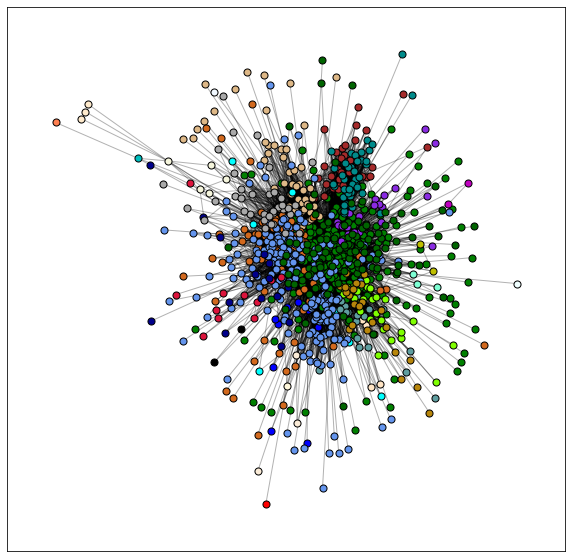

In [46]:
SC_per(7,pos_eu)

eu_comp: Modularity Maximazation algorithm gives 8 communities with a modularity value of: 0.3471325650460906 and a performance value of: 0.7078716240565892


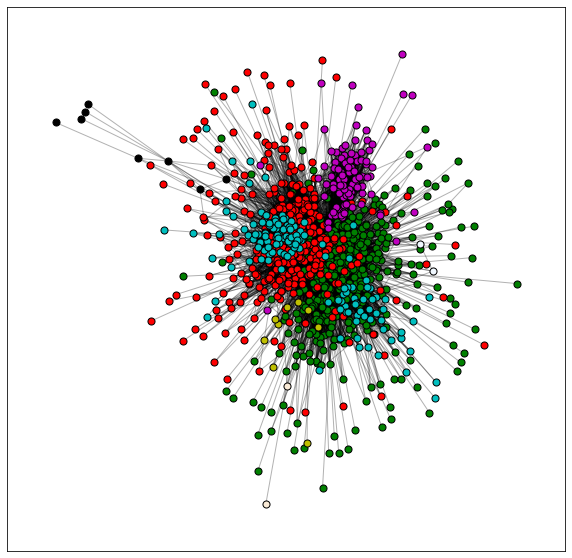

In [47]:
MM(7,pos_eu)

Ground truth communities are 42  with a modularity value of: 0.28801318862374214 and a performance value of: 0.9428136036490563


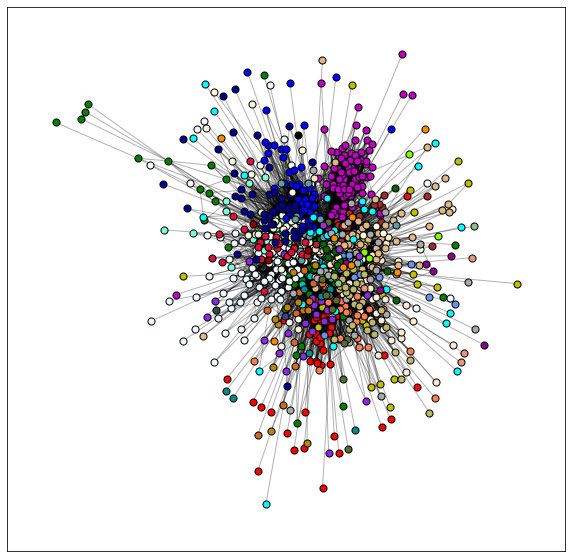

In [48]:
print('Ground truth communities are ' + str(len(ground_truth_coms)) + 
    '  with a modularity value of: ' + str(ground_truth_modularity) +
    ' and a performance value of: ' + str(ground_truth_performance))
visualize(graphs[7][1],ground_truth_coms,pos_eu)


Παρατηρήσεις
> Για τη μεγαλύτερη συνεκτική συνιστώσα του γράφου eu γνωρίζουμε από τη ground truth διαμέριση ότι υπάρχουν 42 κοινότητες. Ο μόνος συνδυασμός που δίνει κοντινή λύση είναι ο SC - performance (εκτός του GN - performance που φαίνεται να δίνει τετριμμένη λύση με κόμβους-φύλλα αν αποτελούν κοινότητα μόνοι τους). Η οπτικοποίηση του γράφου δεν βοηθάει αφού έχει μεγάλο αριθμό κόμβων που είναι όλοι συγκεντρωμένοι στο κέντρο. Έγιναν δοκιμές και με άλλες συναρτήσεις layout αλλά ο μεγάλος αριθμός κόμβων δεν επέτρεπε την εξαγωγή συμπερασμάτων. Το μόνο που εντοπίζεται εύκολα από τις πιο πάνω οπτικοποιήσεις είναι ότι υπάρχουν αρκετοί κόμβοι-φύλλα στο γράφο. Επίσης μπορεί να εξαχθεί το συμπέρασμα ότι ο συνδυασμός GN - modularity δίνει πολύ λάθος αποτέλεσμα γιατί επιστρέφει μόνο δύο κοινότητες όπου η μία έχει μόνο 6 κόμβους. Συγκρίνοντας με την οπτικοποίηση για την ground truth διαμέριση, πιο κοντά φαίνεται να είναι ο συνδυασμός SC - performance που όπως προαναφέρθηκε έχει και πιο κοντινό αριθμό κοινοτήτων.

#### Οπτικοποίηση κοινοτήτων REG

In [49]:
pos_REG = nx.fruchterman_reingold_layout(graphs[0][1])

REG: Girvan-Newman algorithm based on modularity gives 8 communities with a modularity value of: 0.7249999999999999


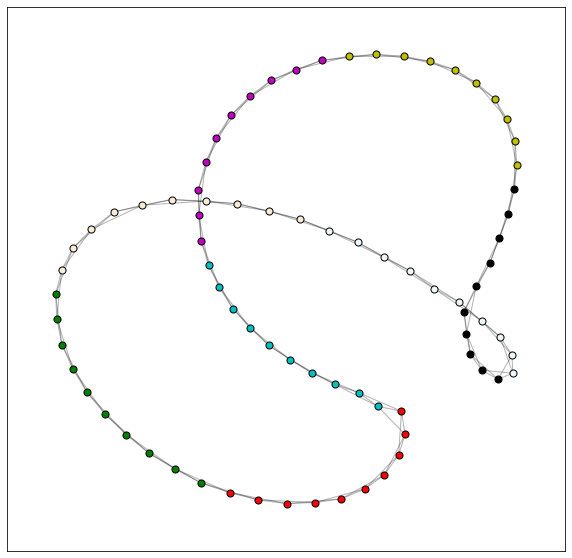

In [50]:
GN_mod(0,pos_REG)

REG: Girvan-Newman algorithm based on performance gives 16 communities with a performance value of: 0.9696202531645569


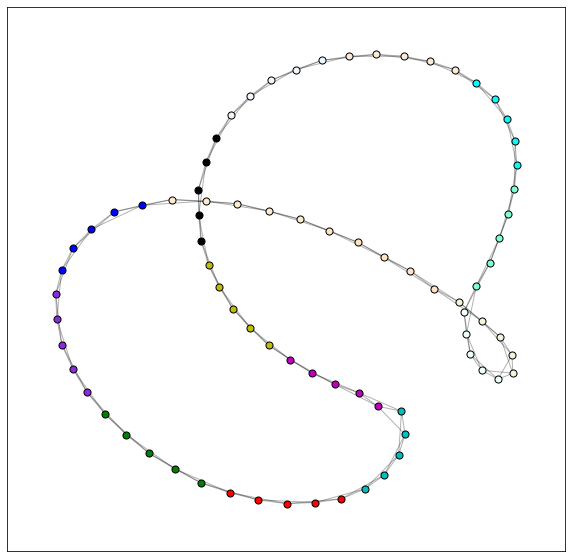

In [51]:
GN_per(0,pos_REG)

REG: Spectral Clustering algorithm based on modularity gives 7 communities with a modularity value of: 0.7256250000000001


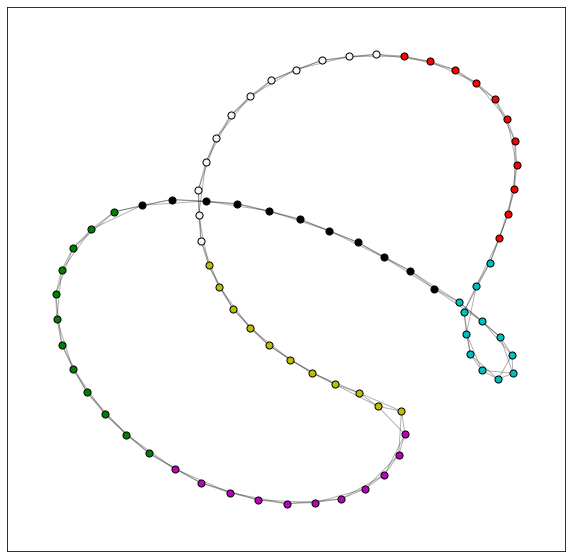

In [52]:
SC_mod(0,pos_REG)

REG: Spectral Clustering algorithm based on performance gives 21 communities with a performance value of: 0.9743670886075949


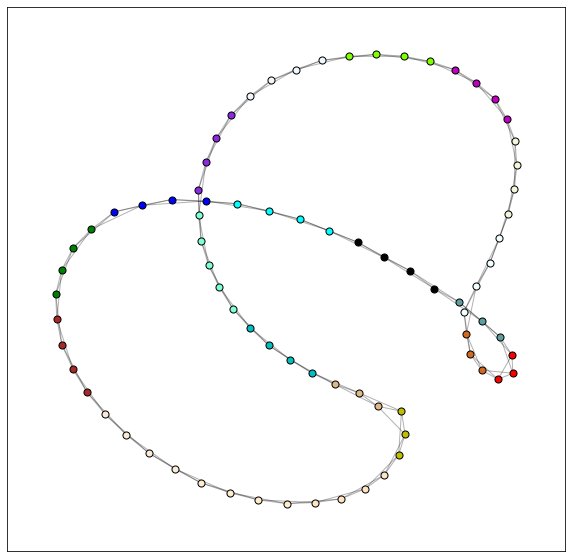

In [53]:
SC_per(0,pos_REG)

REG: Modularity Maximazation algorithm gives 4 communities with a modularity value of: 0.673125 and a performance value of: 0.8006329113924051


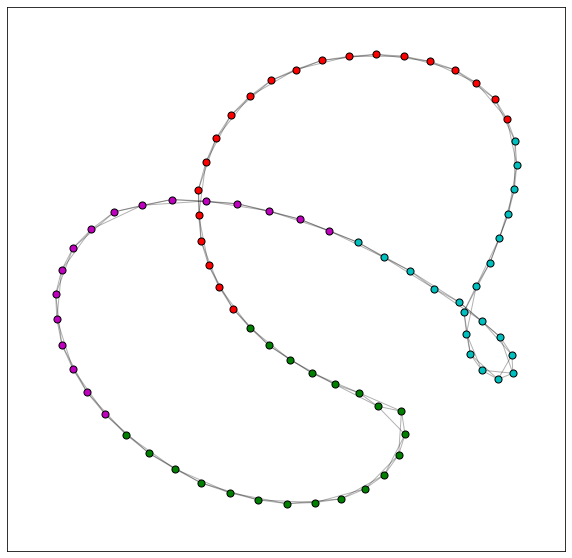

In [54]:
MM(0,pos_REG)

Παρατηρήσεις
> Για τον γράφο REG δεν υπάρχουν εμφανείς κοινότητες αφού όλοι οι κόμβοι έχουν ίδια μορφή με ίδιο βαθμό και ίδιες ακμές προς τις γειτονικές κορυφές. Επομένως, οποιοσδήποτε διαχωρισμός σε κοινότητες που να περιέχουν διαδοχικούς κόμβους μπορεί να θεωρηθεί σωστός. Όλοι οι πιο πάνω συνδυασμοί επιστρέφουν κοινότητες από διαδοχικούς κόμβους όμως οι κοινότητες αυτές δεν έχουν όλες τον ίδιο αριθμό κόμβων  

#### Οπτικοποίηση κοινοτήτων RGER

In [55]:
pos_RGER = nx.fruchterman_reingold_layout(graphs[1][1])

RGER: Girvan-Newman algorithm based on modularity gives 24 communities with a modularity value of: 0.21109444444444445


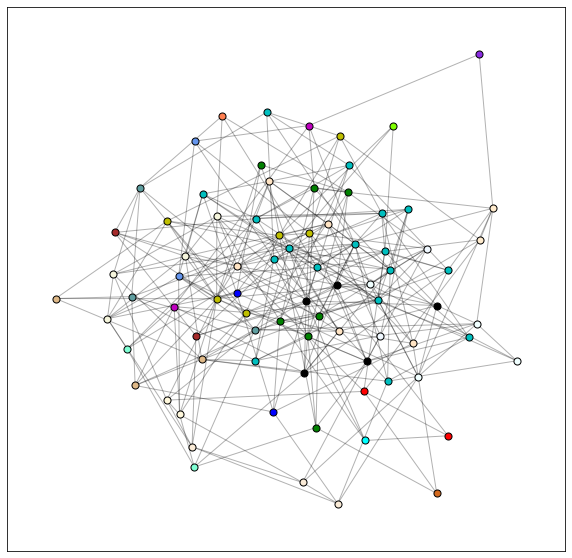

In [56]:
GN_mod(1,pos_RGER)

RGER: Girvan-Newman algorithm based on performance gives 34 communities with a performance value of: 0.9215189873417722


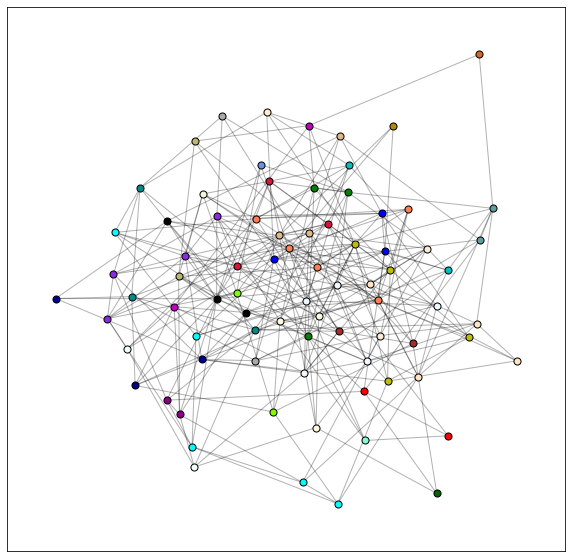

In [57]:
GN_per(1,pos_RGER)

RGER: Spectral Clustering algorithm based on modularity gives 9 communities with a modularity value of: 0.28374444444444447


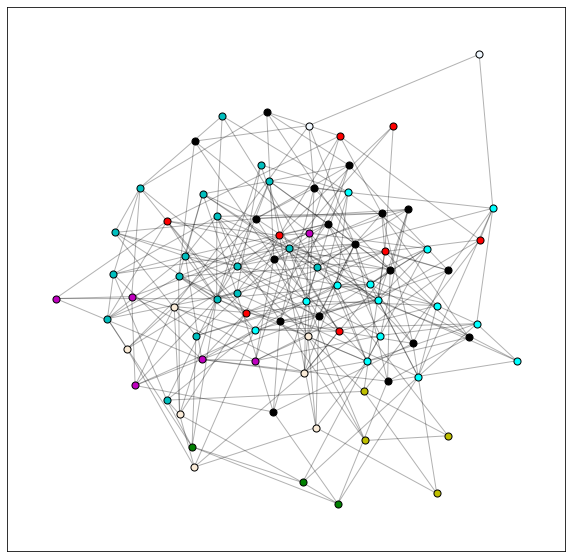

In [58]:
SC_mod(1,pos_RGER)

RGER: Spectral Clustering algorithm based on performance gives 22 communities with a performance value of: 0.9145569620253164


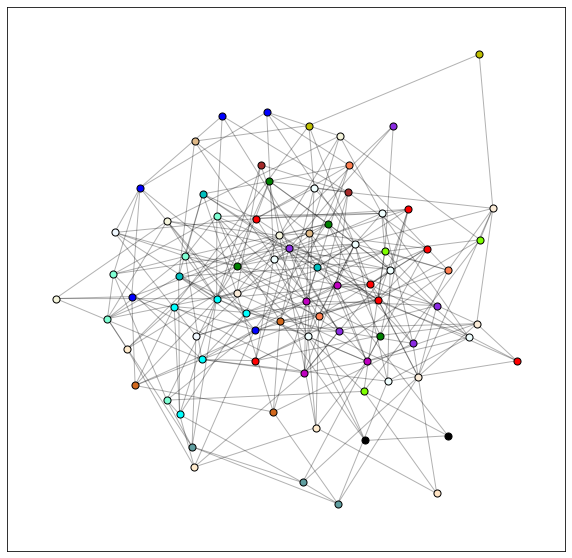

In [59]:
SC_per(1,pos_RGER)

RGER: Modularity Maximazation algorithm gives 4 communities with a modularity value of: 0.28364999999999996 and a performance value of: 0.7591772151898735


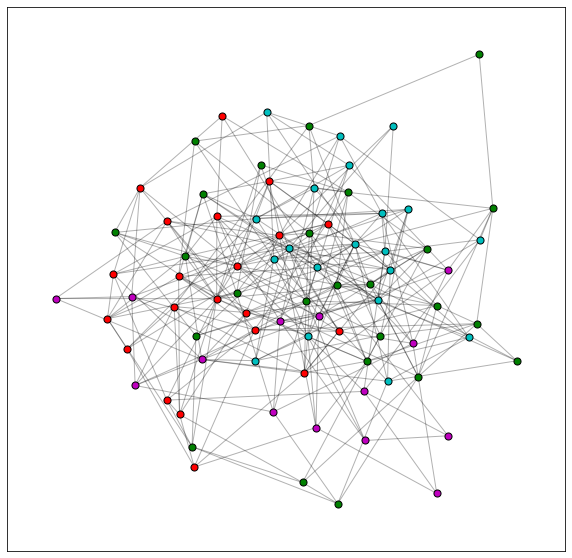

In [60]:
MM(1,pos_RGER)

Παρατηρήσεις
> Η κατανομή των ακμών σε ένα RGER γράφο γίνεται τυχαία και δεν περιμένουμε ούτε σε αυτή την περίπτωση να υπάρχουν εμφανείς κοινότητες κάτι που επιβεβαιώνεται και οπτικά. Παρόλα αυτά φαίνεται πως όλοι οι πιο πάνω συνδυασμοί έχουν ως αρχή να κατατάσσουν στην ίδια κοινότητα κόμβους που σχηματίζουν τρίγωνο.

#### Οπτικοποίηση κοινοτήτων RGG

In [61]:
pos_RGG = nx.fruchterman_reingold_layout(graphs[2][1])

RGG: Girvan-Newman algorithm based on modularity gives 5 communities with a modularity value of: 0.5970493827160495


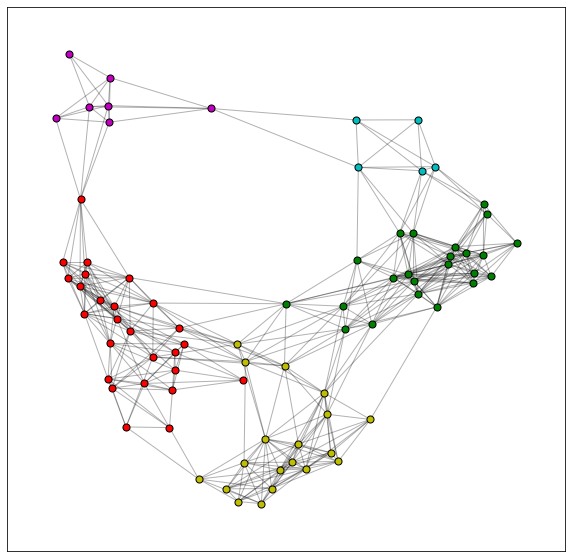

In [62]:
GN_mod(2,pos_RGG)

RGG: Girvan-Newman algorithm based on performance gives 22 communities with a performance value of: 0.9291139240506329


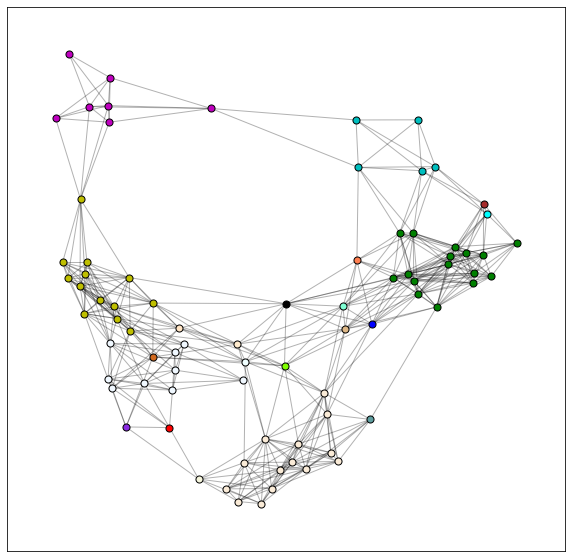

In [63]:
GN_per(2,pos_RGG)

RGG: Spectral Clustering algorithm based on modularity gives 6 communities with a modularity value of: 0.6021827160493828


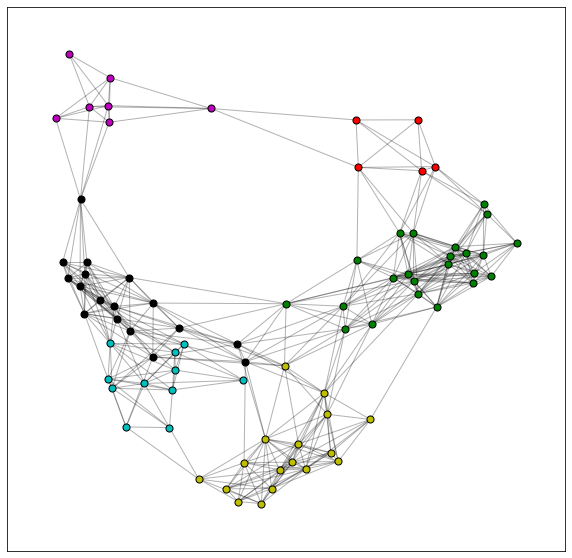

In [64]:
SC_mod(2,pos_RGG)

RGG: Spectral Clustering algorithm based on performance gives 11 communities with a performance value of: 0.9357594936708861


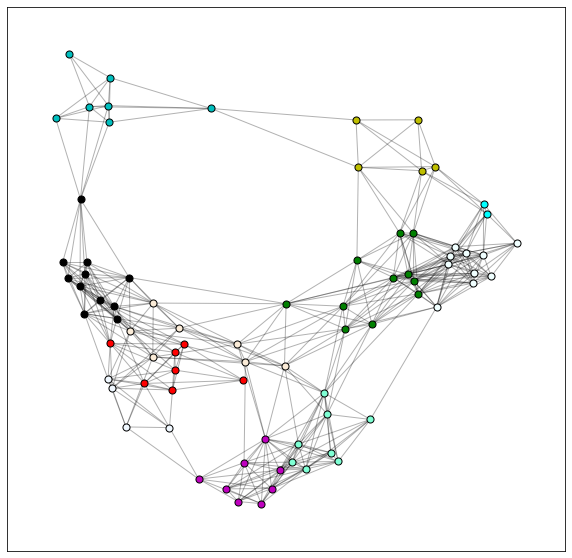

In [65]:
SC_per(2,pos_RGG)

RGG: Modularity Maximazation algorithm gives 4 communities with a modularity value of: 0.5853728395061728 and a performance value of: 0.8291139240506329


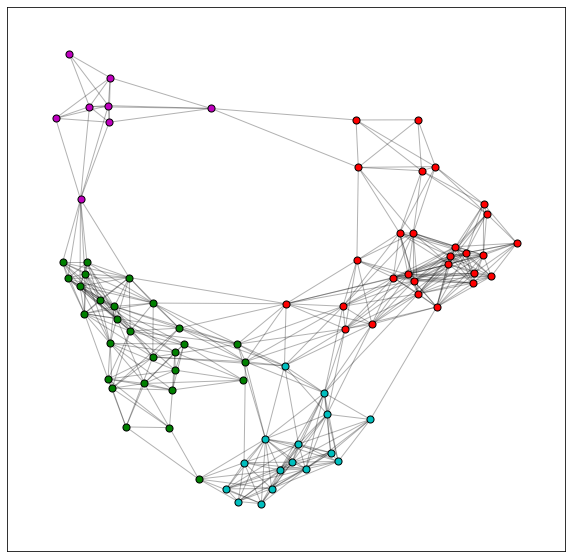

In [66]:
MM(2,pos_RGG)

Παρατήρησεις
> Για τον γράφο RGG αναμένουμε να σχηματίζονται κοινότητες αφού κάθε κόμβος ενώνεται με τους κόμβους που βρίσκονται γύρω του και μόνο, κάτι που επιβεβαιώνεται από τις πιο πάνω οπτικοποιήσεις. Με εξαίρεση τον συνδυασμό GV - performance, όλοι οι πιο πάνω συνδυασμοί φαίνεται να εντοπίζουν αποδεκτές κοινότητες και έχουν ως κοινό χαρακτηριστικό ότι εντοπίζουν ορθά τις 3 εμφανείς κοινότητες που φαίνονται στο κάτω μέρος του γράφου. Οπτικά φαίνεται να δίνει καλύτερη λύση ο συνδυασμός GV - modularity και ο αλγόριθμος MM.

#### Οπτικοποίηση κοινοτήτων SF

In [67]:
pos_SF = nx.fruchterman_reingold_layout(graphs[3][1])

SF: Girvan-Newman algorithm based on modularity gives 30 communities with a modularity value of: 0.13638331024930742


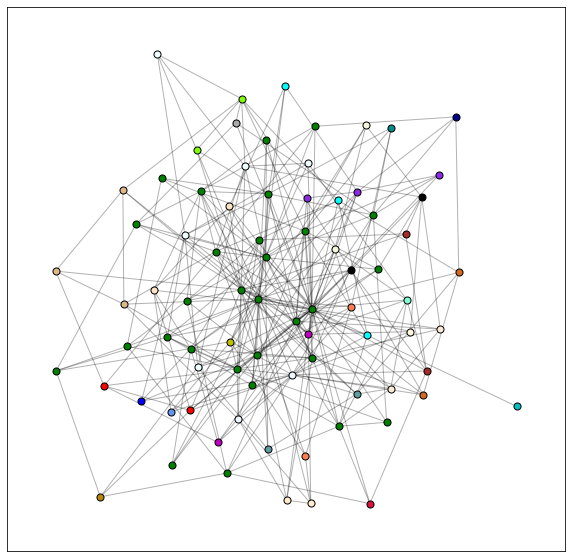

In [68]:
GN_mod(3,pos_SF)

SF: Girvan-Newman algorithm based on performance gives 43 communities with a performance value of: 0.9174050632911392


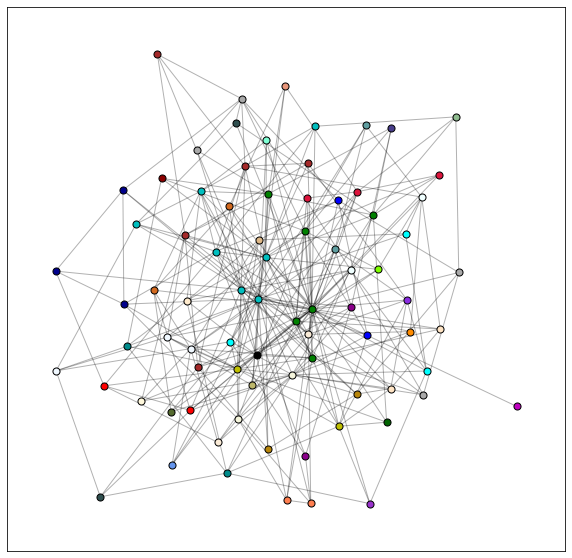

In [69]:
GN_per(3,pos_SF)

SF: Spectral Clustering algorithm based on modularity gives 4 communities with a modularity value of: 0.26802177112188363


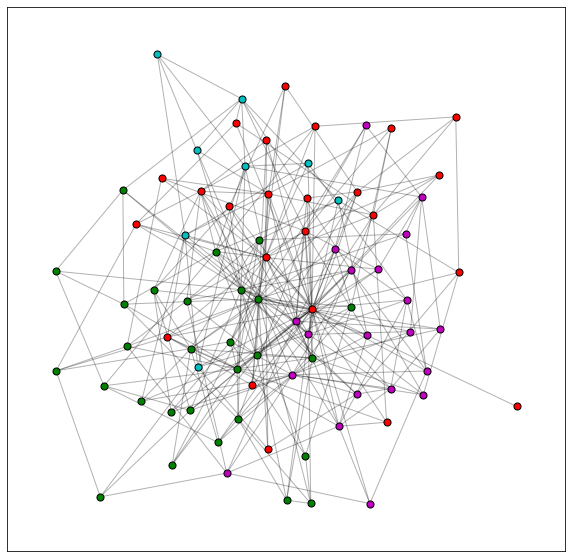

In [70]:
SC_mod(3,pos_SF)

SF: Spectral Clustering algorithm based on performance gives 33 communities with a performance value of: 0.9120253164556962


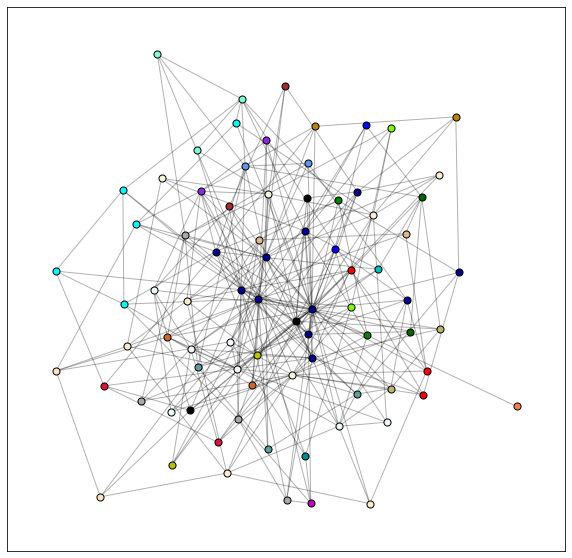

In [71]:
SC_per(3,pos_SF)

SF: Modularity Maximazation algorithm gives 5 communities with a modularity value of: 0.27000194771468145 and a performance value of: 0.7939873417721519


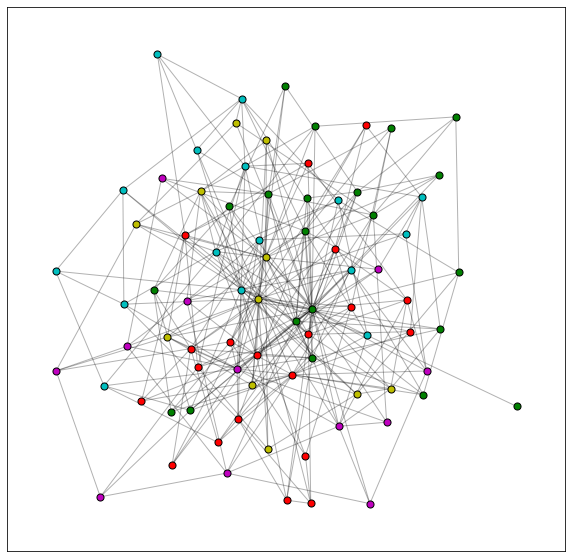

In [72]:
MM(3,pos_SF)

Παρατηρήσεις
> Στην περίπτωση του SF γράφου δεν αναμένουμε εμφανείς κοινότητες, κάτι που φαίνεται και πιο πάνω. Παρόλα αυτά φαίνεται να σχηματίζονται κοινότητες κοντά στους κόμβους με πολλούς γείτονες δηλαδή στο κέντρο των πιο πάνω οπτικοποιήσεων. Φαίνεται ότι οι μόνοι συνδυασμοί που ανιχνεύουν αυτές τις κοινότητες είναι αυτοί που χρησιμοποιούν τη μετρική modularity

#### Οπτικοποίηση κοινοτήτων SW

In [73]:
pos_SW = nx.fruchterman_reingold_layout(graphs[4][1])

SW: Girvan-Newman algorithm based on modularity gives 8 communities with a modularity value of: 0.5741015625


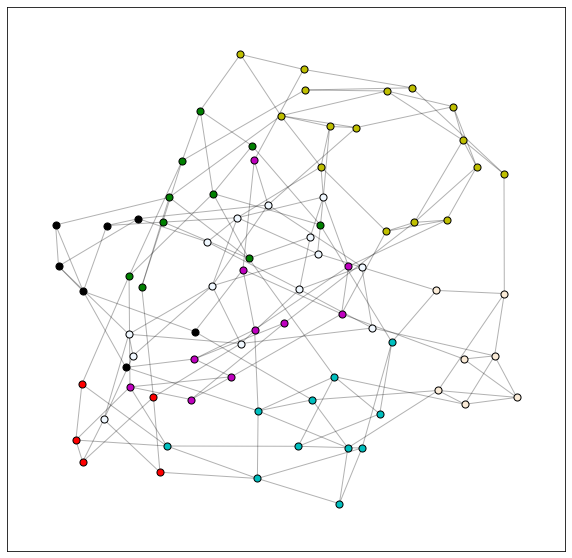

In [74]:
GN_mod(4,pos_SW)

SW: Girvan-Newman algorithm based on performance gives 31 communities with a performance value of: 0.9670886075949368


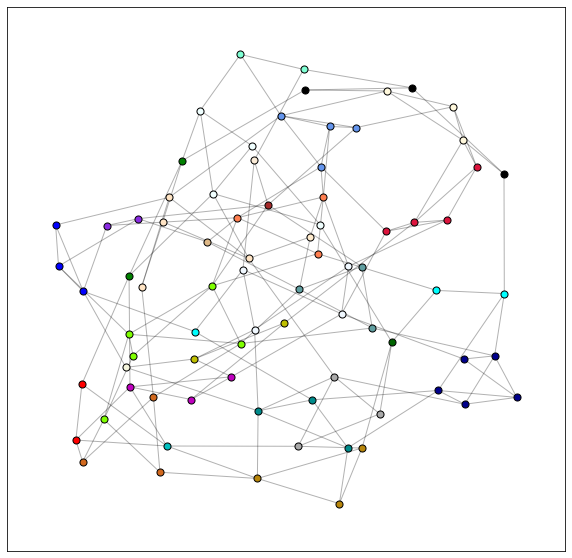

In [75]:
GN_per(4,pos_SW)

SW: Spectral Clustering algorithm based on modularity gives 6 communities with a modularity value of: 0.55951171875


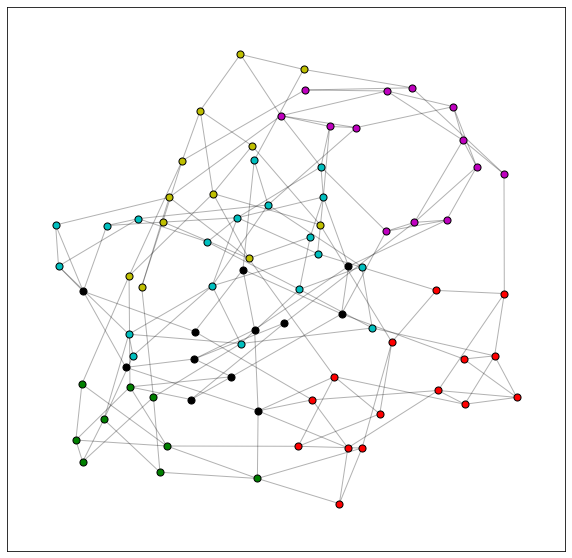

In [76]:
SC_mod(4,pos_SW)

SW: Spectral Clustering algorithm based on performance gives 30 communities with a performance value of: 0.9667721518987342


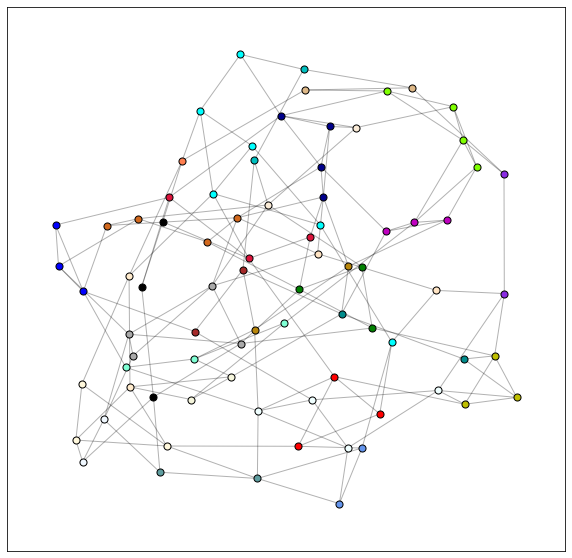

In [77]:
SC_per(4,pos_SW)

SW: Modularity Maximazation algorithm gives 8 communities with a modularity value of: 0.563203125 and a performance value of: 0.9003164556962026


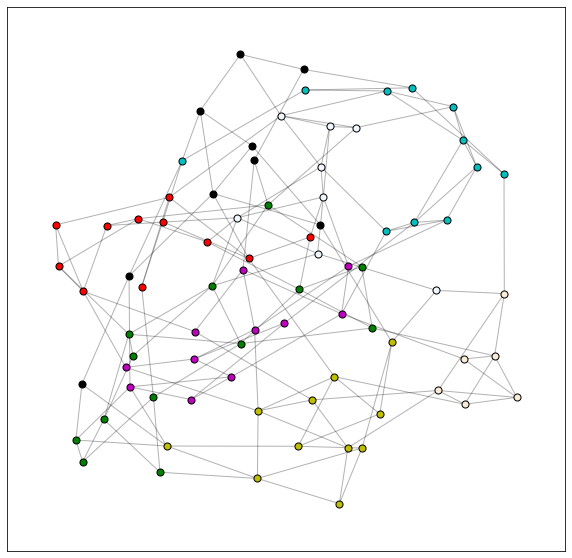

In [78]:
MM(4,pos_SW)

Παρατηρήσεις
> Για τον γράφο SW φαίνεται να υπάρχουν κάποιες κοινότητες χωρίς όμως να διαχωρίζονται ξεκάθαρα μεταξύ τους. Γενικά φαίνεται ότι οι συνδυασμοί διαχωρίζουν τους κόμβους σε κοινότητες με αποδεκτό τρόπο ομαδοποιώντας κόμβους που βρίσκονται κοντά και έχουν αρκετές ακμές μεταξύ τους και κόμβοι που σχηματίζουν τρίγωνα φαίνεται ότι κατά κανόνα τοποθετούνται στις ίδιες κοινότητες